#           HR Analytics and Employee Turnover Prediction

## Data Preprocessing and Exploratory Data Analysis

In [1]:
import pandas as pd# importing the pandas library for reading csv files and creating data frames and for analysis
pd.options.display.max_columns=40

In [2]:
df_employee=pd.read_csv('/home/school/Documents/Employee turnover and hr analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv')#reading csv file and converting it to a df_employeeframe

In [3]:
df_employee.head()#Displaying the first five rows of dataframe

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
print(df_employee.shape)#The no of rows and columns in the dataframe
print('The dataset has ',df_employee.shape[0],'rows and ',df_employee.shape[1],'columns')

(1470, 35)
The dataset has  1470 rows and  35 columns


In [5]:
print('\t\t\tInformation regarding the features of Dataset\n\n\n ')
df_employee.info()#displaying the columns names,number of non null values and datatypes

			Information regarding the features of Dataset


 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement           

The dataset has 26 int64 type features and 9 object type features.There are no null values for any columns

In [6]:
print(df_employee['Attrition'].unique())
print(df_employee['Over18'].unique())
print(df_employee['OverTime'].unique())

['Yes' 'No']
['Y']
['Yes' 'No']


The above values can be mappped to 0 for No and 1 for Yes and Y

In [7]:
df_employee['Attrition']=df_employee['Attrition'].map({'No':0,'Yes':1})
df_employee['Over18']=df_employee['Over18'].map({'Y':1})
df_employee['OverTime']=df_employee['OverTime'].map({'No':0,'Yes':1})  #mapping the values to numerical values

In [8]:
df_employee.head() 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [9]:
print('\t\t\tDataframe consisting of  only numerical columns')
dfnum=df_employee.select_dtypes(include=['int64','float64']) #for selecting the dataframe with only numerical values
dfnum.head()

			Dataframe consisting of  only numerical columns


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [10]:
print('\t\tBasic Statistical Description of Dataframe consisting of numerical columns')
dfnum.describe().T

		Basic Statistical Description of Dataframe consisting of numerical columns


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


Majority of employees who are working in the company are aged 37 and the minimum and maximum age of employees are 18 and 60 respectively.

The average daily rate of the empployees is 802.5 dollars with minimum being 102 dollars and maximum being 1499 dollars

Most of the employees are living within the range of 9.2miles from the company

Most of the employees are having decent education level of 3

Majority of the employees are earning 66 dollars per hour with the employees earning 100 dollars as highest and 30 dollars being the lowest 

Environment Satisfaction,Job Involvement,Job Satisfaction,Relationship Satisfaction and work life balance are having the similar mean value measure which infer that majority of the employees are happy to work and are more productive

Coming to the job level,majority of the employees are having level of 2 with the highest being 5 and lowest being 1.It would be better if the average job level was raised to 3

Most of the employees are having an average take home of 6503 dollars with the highest being 19999 dollars and lowest being 1009 dollars.

Majority of the employees have working in about 3 other companies before joining the company which tells that the workforce is having a lot of experienced employees

All the employees are over the age of 18

The average salary hike for employees is 15 percent with the lowest being 11 percent and highest being 25 percent which is also a good indication and company should retain the present levels

The performance levels of employees are very good and the best performers are having a score of 4

The Standard working hours of the employees is 80 hours per month

Only a few of the employees are getting company stocks and this should be a case which is to be looked upon by the management.Better stock option level should be offered to more number of employees

Majority of the employees have working for more tha 11 years which further supports the statement that the workforce is rich with experienced employees

The company used to provide 3 trainings in an year for majority of the employees and there are certain employees who are given 6 training in an year and there are employees who havent got any trainings.The company should atleast provide 1 training to all the employees as more trained employees are necesary for increasing the productivity

Most of the employees are working in the company for over 7 years with the highest being there working for 40 years  and majority of employees wish to work for over 4 years in their present role.

Majority of employees got promoted 2 years back

Most of the employees wish to work with the same manager for over 4 years and there are employees who are working for over 17 years with the current manager

In [11]:
print('\t\t\tDataframe consisting of only categorical columns')
dfobj=df_employee.select_dtypes(include=['object']) #selecting the dataframe with only object datatype
dfobj.head()

			Dataframe consisting of only categorical columns


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


In [12]:
print('\t\t\tDescription of Dataframe consisting of categorical columns')
dfobj.describe(include='O')

			Description of Dataframe consisting of categorical columns


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1043,961,606,882,326,673


Most of the employees tend to travel rarely for business purposes,work in the department of Research & Development having educational background in Life Sciences.Male employees are more in number in the workforce and most of the employees work as Sales Executive.Majority of the employees are married people

In [13]:
#unique values in each categorical columns
print('\t\t\tUnique Values for each Columns')
for i in dfobj.columns:
    print(i)
    print('-'*25)
    print()
    for j in dfobj[i].unique():   #displaying the unique categorical values
        print(j)
    print()
    

			Unique Values for each Columns
BusinessTravel
-------------------------

Travel_Rarely
Travel_Frequently
Non-Travel

Department
-------------------------

Sales
Research & Development
Human Resources

EducationField
-------------------------

Life Sciences
Other
Medical
Marketing
Technical Degree
Human Resources

Gender
-------------------------

Female
Male

JobRole
-------------------------

Sales Executive
Research Scientist
Laboratory Technician
Manufacturing Director
Healthcare Representative
Manager
Sales Representative
Research Director
Human Resources

MaritalStatus
-------------------------

Single
Married
Divorced



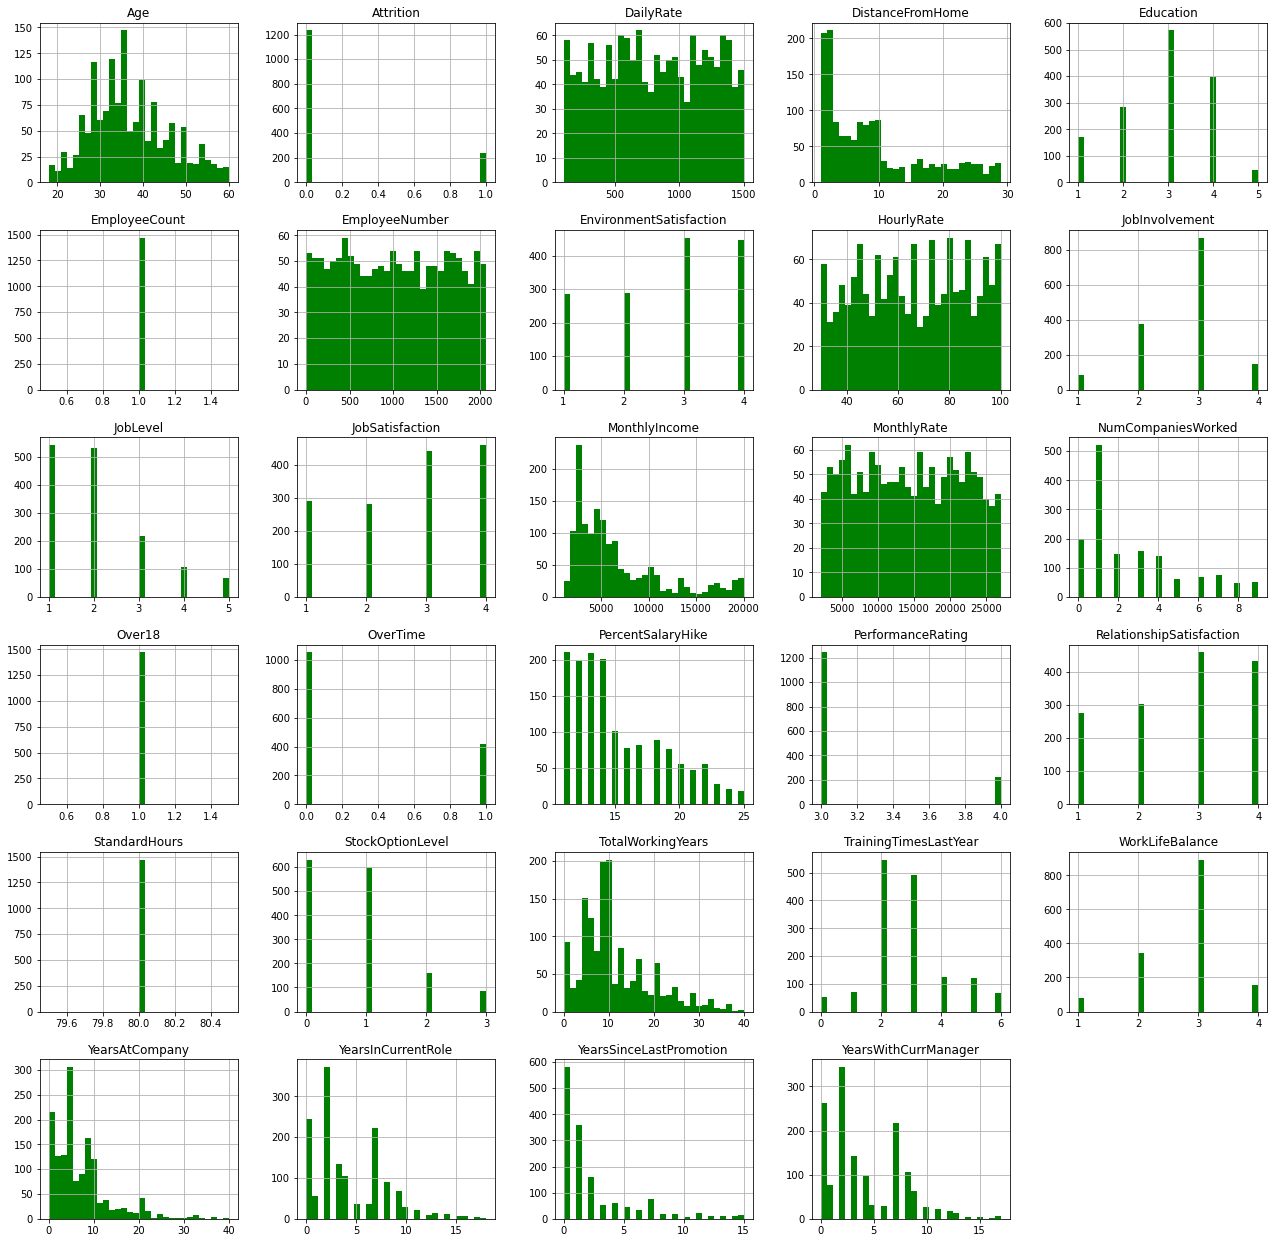

In [14]:
import matplotlib.pyplot as plt

df_employee.hist(bins=30,figsize=(22,22),color='green')
plt.show()

In [15]:
df_left=df_employee[df_employee['Attrition']==1]# dataframe having information of only the left employees
df_stayed=df_employee[df_employee['Attrition']==0]#dataframe having information of only the the stayed employees

Total Employees: 1470
Number of Employees left the Company: 237
Number of Employees stayed in the Company: 1233

Employee Attrition PieChart


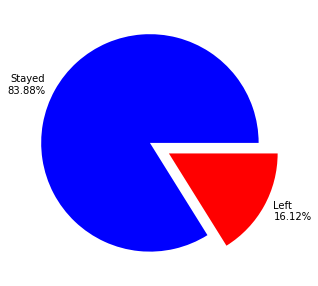

In [16]:
print('Total Employees:',df_employee.shape[0])
print('Number of Employees left the Company:',df_left.shape[0])
print('Number of Employees stayed in the Company:',df_stayed.shape[0])
print('\nEmployee Attrition PieChart')
perstay=round((df_stayed.shape[0])/df_employee.shape[0]*100,2)
perleft=round((df_left.shape[0])/df_employee.shape[0]*100,2)
plt.figure(figsize=(10,5))#plotting a pie chart 
plt.pie(df_employee['Attrition'].value_counts(),labels=['Stayed\n'+str(perstay)+'%','Left\n'+str(perleft)+'%'],explode=[0,0.2],colors=['blue','red'])
plt.show()

From the above information,it is clear that the dataset we are working on for building the ML model is an imbalanced one

					Correlation Heatmap


<AxesSubplot:>

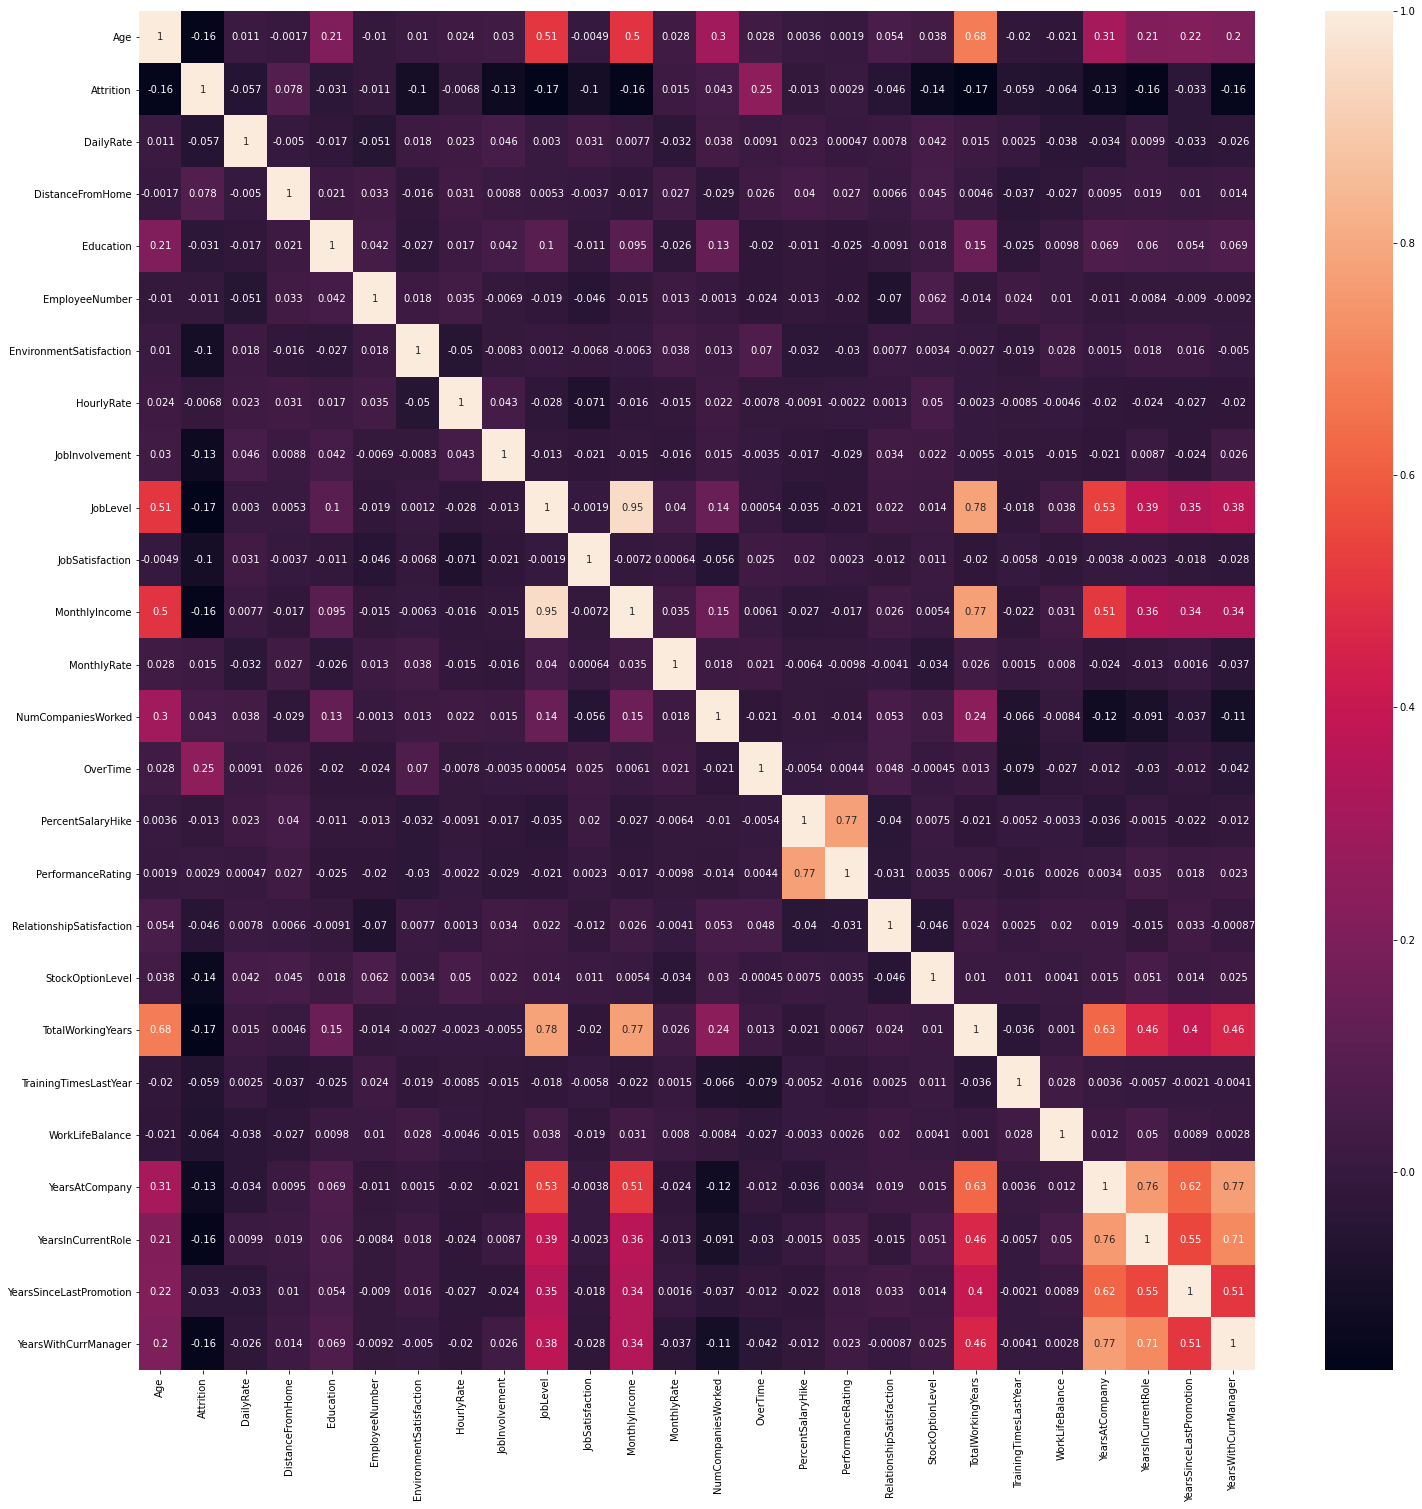

In [17]:
print('\t\t\t\t\tCorrelation Heatmap')
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(df_employee.drop(['EmployeeCount','Over18','StandardHours'],axis=1).corr(),annot=True) #plotting the correlation heatmap

From the above correlation heatmap,age is having high correlation with Joblevel,monthly income and total working years

Job level is having high correlation with monthly income,total working years and years at company

Monthly income is having high correlation with total working years and years at company

Percent salary hike is having high correlation with performance rating

Total working years is highly correlated with years at company,years in currentrole,years since last promotion and years with current manager

Years at company is having a high correlation with years in current role,years since last promotion and years with current manager

In [18]:
print('Basic Statistical description of the dataset of Employees who left the Company')
df_left.describe()

Basic Statistical description of the dataset of Employees who left the Company


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,1.0,0.535865,15.097046,3.156118,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,0.0,580.750572,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,0.0,0.499768,3.770294,0.363735,1.125437,0.0,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.0,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.0,514.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,1.0,1017.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,1.0,1.000000,14.000000,3.000000,3.000000,80.0,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,1.0,1486.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,1.0,1.000000,17.000000,3.000000,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,1.0,2055.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [19]:
df_left.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,237,237,237,237,237,237
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Laboratory Technician,Single
freq,156,133,89,150,62,120


In [20]:
print('Basic Statistical description of employees who stayed in the company')
df_stayed.describe()

Basic Statistical description of employees who stayed in the company


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,14265.779400,2.64558,1.0,0.234388,15.231144,3.153285,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,0.0,606.217074,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,7102.260749,2.46009,0.0,0.423787,3.639511,0.360408,1.071603,0.0,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.00000,1.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,1.0,483.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,7973.000000,1.00000,1.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,1.0,1022.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,14120.000000,2.00000,1.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,1.0,1574.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,20364.000000,4.00000,1.0,0.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26997.000000,9.00000,1.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [21]:
df_stayed.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1233,1233,1233,1233,1233,1233
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,887,828,517,732,269,589


In [22]:
df_overtime=df_employee[(df_employee['OverTime']==1)&(df_employee['Attrition']==0)]
print('Details of employees who are working for overtime and still in the company')
print('Number of employees working for overtime:',df_overtime.shape[0])
df_overtime

Details of employees who are working for overtime and still in the company
Number of employees working for overtime: 289


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
11,29,0,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,4,Female,49,2,2,Laboratory Technician,3,Single,4193,12682,0,1,1,12,3,4,80,0,10,3,3,9,5,0,8
16,32,0,Travel_Rarely,334,Research & Development,5,2,Life Sciences,1,21,1,Male,80,4,1,Research Scientist,2,Divorced,3298,15053,0,1,1,12,3,4,80,2,7,5,2,6,2,0,5
17,22,0,Non-Travel,1123,Research & Development,16,2,Medical,1,22,4,Male,96,4,1,Laboratory Technician,4,Divorced,2935,7324,1,1,1,13,3,2,80,2,1,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,21,0,Travel_Rarely,501,Sales,5,1,Medical,1,2021,3,Male,58,3,1,Sales Representative,1,Single,2380,25479,1,1,1,11,3,4,80,0,2,6,3,2,2,1,2
1450,35,0,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,3,Female,31,3,3,Human Resources,4,Single,8837,16642,1,1,1,16,3,3,80,0,9,2,3,9,0,1,7
1456,35,0,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,3,Male,80,3,2,Healthcare Representative,3,Married,5689,24594,1,1,1,14,3,4,80,2,10,2,4,10,2,0,2
1459,29,0,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,4,Male,46,2,2,Laboratory Technician,2,Married,4025,23679,4,1,1,13,3,1,80,1,10,2,3,4,3,0,3


In [23]:
df_overtime.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,289.000000,289.0,289.000000,289.000000,289.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.0,289.0,289.000000,289.000000,289.000000,289.0,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000,289.000000
mean,38.968858,0.0,824.352941,8.826990,2.906574,1.0,1015.972318,2.958478,65.584775,2.802768,2.280277,2.865052,7365.328720,14602.273356,2.477509,1.0,1.0,15.100346,3.145329,2.851211,80.0,0.896194,12.965398,2.678201,2.750865,7.878893,4.602076,2.224913,4.349481
std,9.000525,0.0,416.088582,7.605131,1.084098,0.0,604.844642,0.978061,19.845250,0.691611,1.112270,1.126907,4823.840077,7065.378473,2.271582,0.0,0.0,3.619052,0.353043,1.035150,0.0,0.843451,8.053996,1.125883,0.661601,6.850274,3.744087,3.346007,3.525553
min,19.000000,0.0,117.000000,1.000000,1.000000,1.0,5.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1129.000000,2112.000000,0.000000,1.0,1.0,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.0,482.000000,2.000000,2.000000,1.0,466.000000,2.000000,48.000000,2.000000,1.000000,2.000000,4014.000000,8423.000000,1.000000,1.0,1.0,12.000000,3.000000,2.000000,80.0,0.000000,7.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,38.000000,0.0,833.000000,7.000000,3.000000,1.0,1003.000000,3.000000,69.000000,3.000000,2.000000,3.000000,5666.000000,14908.000000,2.000000,1.0,1.0,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,45.000000,0.0,1207.000000,12.000000,4.000000,1.0,1547.000000,4.000000,81.000000,3.000000,3.000000,4.000000,10124.000000,20497.000000,4.000000,1.0,1.0,18.000000,3.000000,4.000000,80.0,1.000000,18.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,0.0,1498.000000,29.000000,5.000000,1.0,2064.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19847.000000,26933.000000,9.000000,1.0,1.0,25.000000,4.000000,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,16.000000,15.000000,17.000000


In [24]:
df_overtime.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,289,289,289,289,289,289
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married
freq,211,197,116,156,64,143


In [25]:
df_best=df_employee[(df_employee['PerformanceRating']==df_employee['PerformanceRating'].max())&(df_employee['Attrition']==0)]
print('\t\t\t\t\tBest Performing Employees')
print('Number of Employees:',df_best.shape[0])
df_best

					Best Performing Employees
Number of Employees: 189


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,Male,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,1,0,22,4,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,Male,44,2,3,Manufacturing Director,3,Single,9526,8787,0,1,0,21,4,2,80,0,10,2,3,9,7,1,8
44,30,0,Travel_Frequently,721,Research & Development,1,2,Medical,1,57,3,Female,58,3,2,Laboratory Technician,4,Single,4011,10781,1,1,0,23,4,4,80,0,12,2,3,12,8,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,56,0,Non-Travel,667,Research & Development,1,4,Life Sciences,1,2026,3,Male,57,3,2,Healthcare Representative,3,Divorced,6306,26236,1,1,0,21,4,1,80,1,13,2,2,13,12,1,9
1445,41,0,Travel_Rarely,582,Research & Development,28,4,Life Sciences,1,2034,1,Female,60,2,4,Manufacturing Director,2,Married,13570,5640,0,1,0,23,4,3,80,1,21,3,3,20,7,0,10
1446,34,0,Travel_Rarely,704,Sales,28,3,Marketing,1,2035,4,Female,95,2,2,Sales Executive,3,Married,6712,8978,1,1,0,21,4,4,80,2,8,2,3,8,7,1,7
1447,36,0,Non-Travel,301,Sales,15,4,Marketing,1,2036,4,Male,88,1,2,Sales Executive,4,Divorced,5406,10436,1,1,0,24,4,1,80,1,15,4,2,15,12,11,11


In [26]:
df_best.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,189.000000,189.0,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.0,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,37.767196,0.0,815.264550,9.132275,2.862434,1.0,1002.306878,2.682540,66.206349,2.724868,2.132275,2.857143,6822.158730,14162.830688,2.629630,1.0,0.222222,21.809524,4.0,2.661376,80.0,0.883598,12.190476,2.804233,2.761905,7.592593,4.878307,2.529101,4.597884
std,9.279283,0.0,412.600928,8.587997,1.097442,0.0,638.325911,1.079185,20.742206,0.735473,1.085918,1.108821,4866.010938,7370.550415,2.399107,0.0,0.416844,1.569562,0.0,1.067728,0.0,0.803712,7.959720,1.275290,0.661581,5.943721,3.867624,3.622543,3.608087
min,19.000000,0.0,116.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1052.000000,2137.000000,0.000000,1.0,0.000000,20.000000,4.0,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,1.0,453.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2886.000000,7693.000000,1.000000,1.0,0.000000,20.000000,4.0,2.000000,80.0,0.000000,7.000000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,802.000000,7.000000,3.000000,1.0,920.000000,3.000000,67.000000,3.000000,2.000000,3.000000,5130.000000,13273.000000,2.000000,1.0,0.000000,22.000000,4.0,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,6.000000,4.000000,1.000000,4.000000
75%,44.000000,0.0,1202.000000,12.000000,4.000000,1.0,1581.000000,4.000000,83.000000,3.000000,3.000000,4.000000,9526.000000,20520.000000,4.000000,1.0,0.000000,23.000000,4.0,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000
max,60.000000,0.0,1492.000000,29.000000,5.000000,1.0,2064.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19973.000000,26968.000000,9.000000,1.0,1.000000,25.000000,4.0,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,36.000000,16.000000,15.000000,17.000000


In [27]:
df_best.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,189,189,189,189,189,189
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Research Scientist,Married
freq,132,130,79,110,37,99


In [28]:
df_impemp=df_employee[(df_employee['PerformanceRating']==df_employee['PerformanceRating'].max())&(df_employee['OverTime']==1)&(df_employee['Attrition']==0)]

In [484]:
print('\t\t\tHybrid of Best Performers and Hard Working Employees')
print('Number of employees:',df_impemp.shape[0])
df_impemp

			Hybrid of Best Performers and Hard Working Employees
Number of employees: 42


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,1,20,4,1,80,3,12,3,2,1,0,0,0
48,46,0,Travel_Frequently,1211,Sales,5,4,Marketing,1,62,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,1,1,21,4,3,80,0,14,4,3,9,6,0,8
52,44,0,Travel_Rarely,1488,Sales,1,5,Marketing,1,68,2,Female,75,3,2,Sales Executive,1,Divorced,5454,4009,5,1,1,21,4,3,80,1,9,2,2,4,3,1,3
60,32,0,Travel_Rarely,427,Research & Development,1,3,Medical,1,78,1,Male,33,3,2,Manufacturing Director,4,Married,6162,10877,1,1,1,22,4,2,80,1,9,3,3,9,8,7,8
79,46,0,Travel_Rarely,945,Human Resources,5,2,Medical,1,103,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,1,1,22,4,4,80,1,16,2,3,4,2,0,2
91,51,0,Travel_Rarely,632,Sales,21,4,Marketing,1,120,3,Male,71,3,2,Sales Executive,4,Single,5441,8423,0,1,1,22,4,4,80,0,11,2,1,10,7,1,0
142,38,0,Travel_Rarely,364,Research & Development,3,5,Technical Degree,1,193,4,Female,32,3,2,Research Scientist,3,Single,4317,2302,3,1,1,20,4,2,80,0,19,2,3,3,2,2,2
152,53,0,Travel_Rarely,1436,Sales,6,2,Marketing,1,205,2,Male,34,3,2,Sales Representative,3,Married,2306,16047,2,1,1,20,4,4,80,1,13,3,1,7,7,4,5
157,58,0,Travel_Rarely,1145,Research & Development,9,3,Medical,1,214,2,Female,75,2,1,Research Scientist,2,Married,3346,11873,4,1,1,20,4,2,80,1,9,3,2,1,0,0,0
180,31,0,Travel_Rarely,140,Research & Development,12,1,Medical,1,246,3,Female,95,3,1,Research Scientist,4,Married,3929,6984,8,1,1,23,4,3,80,1,7,0,3,4,2,0,2


In [30]:
df_impemp.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,42.000000,42.0,42.000000,42.000000,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.0,42.0,42.000000,42.0,42.000000,42.0,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,39.476190,0.0,822.380952,6.571429,2.952381,1.0,946.047619,2.833333,64.928571,2.833333,2.190476,2.809524,6851.833333,13691.809524,2.523810,1.0,1.0,21.785714,4.0,2.642857,80.0,1.047619,12.928571,2.500000,2.523810,7.976190,5.166667,2.309524,4.738095
std,9.031755,0.0,423.044307,6.081330,1.058125,0.0,648.174056,1.080123,18.899468,0.762431,1.041530,1.254030,4705.896280,6745.874831,2.244104,0.0,0.0,1.645922,0.0,1.077971,0.0,0.824987,6.933105,1.018128,0.633923,6.094732,4.113729,2.975412,3.541114
min,25.000000,0.0,140.000000,1.000000,1.000000,1.0,10.000000,1.000000,32.000000,1.000000,1.000000,1.000000,1702.000000,2302.000000,0.000000,1.0,1.0,20.000000,4.0,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.250000,0.0,455.000000,2.000000,2.000000,1.0,340.750000,2.000000,51.250000,3.000000,2.000000,2.000000,3950.250000,7913.750000,1.000000,1.0,1.0,20.000000,4.0,2.000000,80.0,1.000000,8.000000,2.000000,2.000000,4.000000,2.000000,0.000000,2.000000
50%,38.000000,0.0,793.500000,5.000000,3.000000,1.0,877.000000,3.000000,70.500000,3.000000,2.000000,3.000000,5386.500000,13636.000000,2.000000,1.0,1.0,21.500000,4.0,3.000000,80.0,1.000000,11.500000,2.000000,3.000000,7.000000,5.000000,1.000000,4.000000
75%,45.500000,0.0,1143.000000,8.750000,4.000000,1.0,1511.500000,4.000000,79.500000,3.000000,2.750000,4.000000,7444.250000,19194.750000,4.000000,1.0,1.0,23.000000,4.0,3.750000,80.0,1.000000,16.750000,3.000000,3.000000,10.000000,7.750000,5.000000,7.000000
max,59.000000,0.0,1490.000000,24.000000,5.000000,1.0,2064.000000,4.000000,98.000000,4.000000,5.000000,4.000000,19847.000000,25927.000000,8.000000,1.0,1.0,25.000000,4.0,4.000000,80.0,3.000000,32.000000,5.000000,3.000000,29.000000,14.000000,11.000000,15.000000


In [31]:
df_impemp.describe(include='O')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,42,42,42,42,42,42
unique,3,3,5,2,9,3
top,Travel_Rarely,Research & Development,Medical,Female,Sales Executive,Married
freq,35,23,17,24,11,25


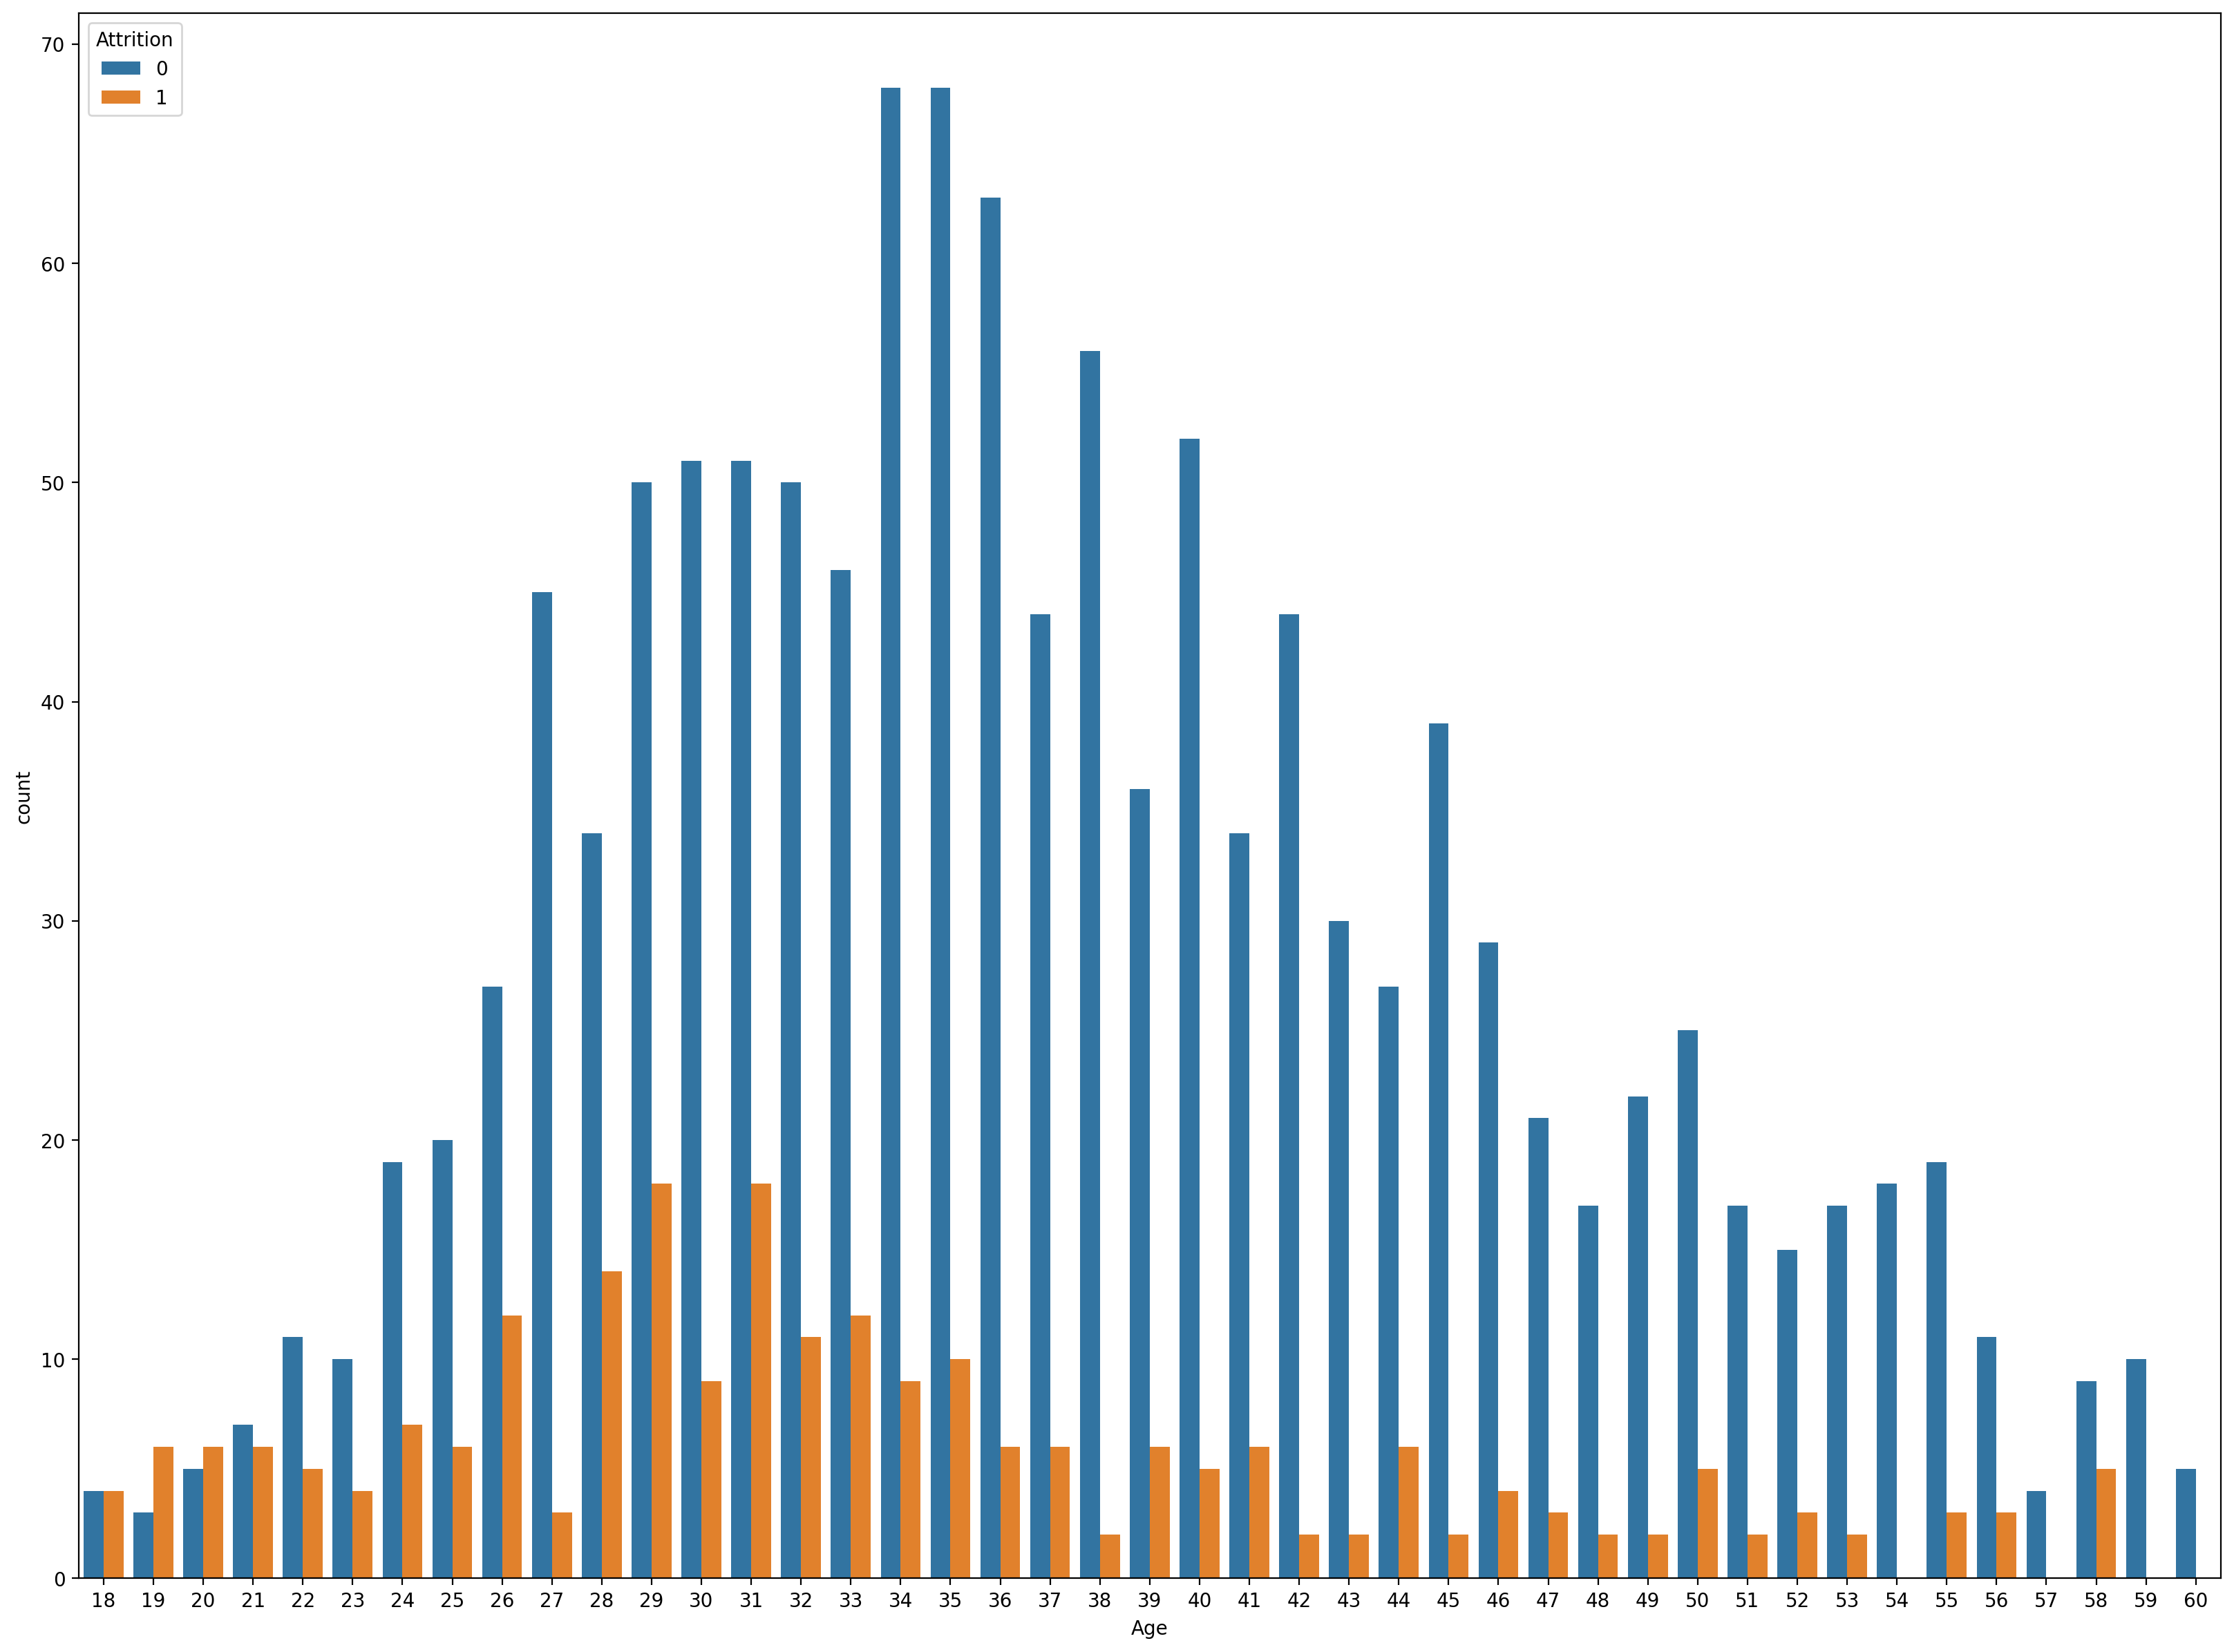

In [32]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='Age',hue='Attrition',data=df_employee) #plotting the countplot
plt.show()

Younger employees of age in the range 18-21 tend to leave from the company.Employees of age 26,28,29,31,32,33,35 also tend to leave the company

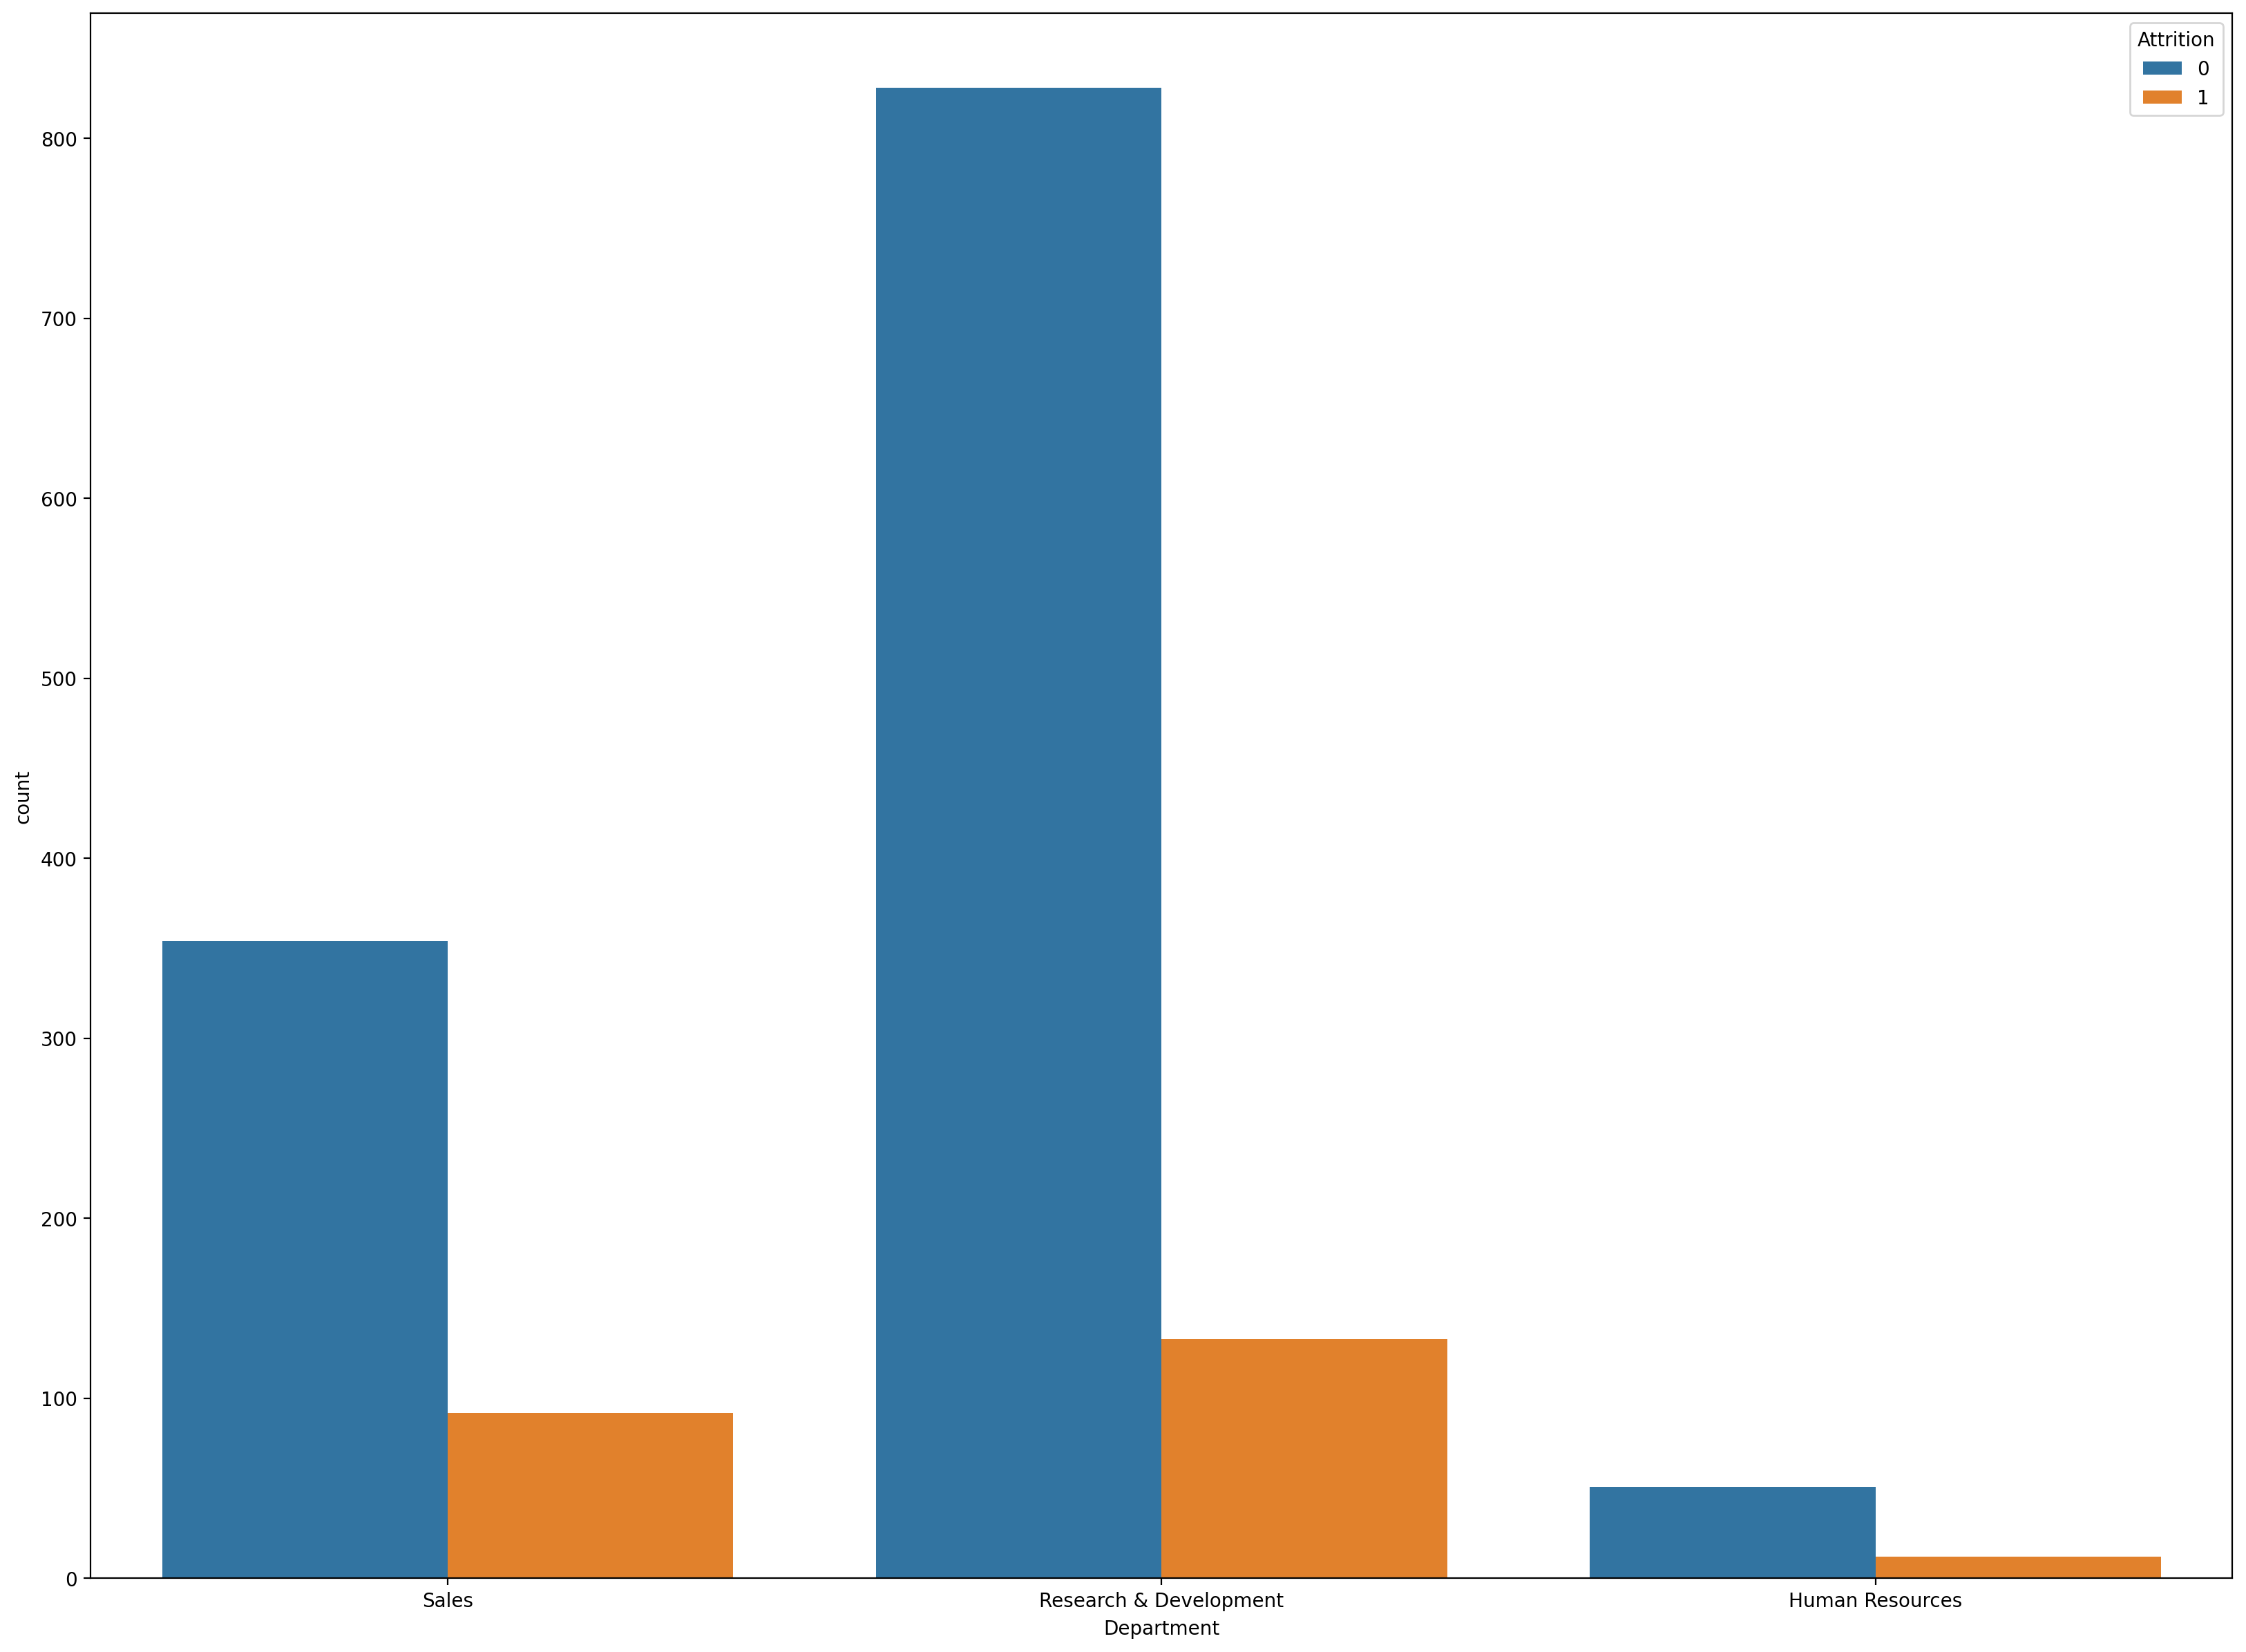

In [33]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='Department',hue='Attrition',data=df_employee)
plt.show()

Comparing the countplots,more employees working in the Sales department tend to leave from the company than the other two departments

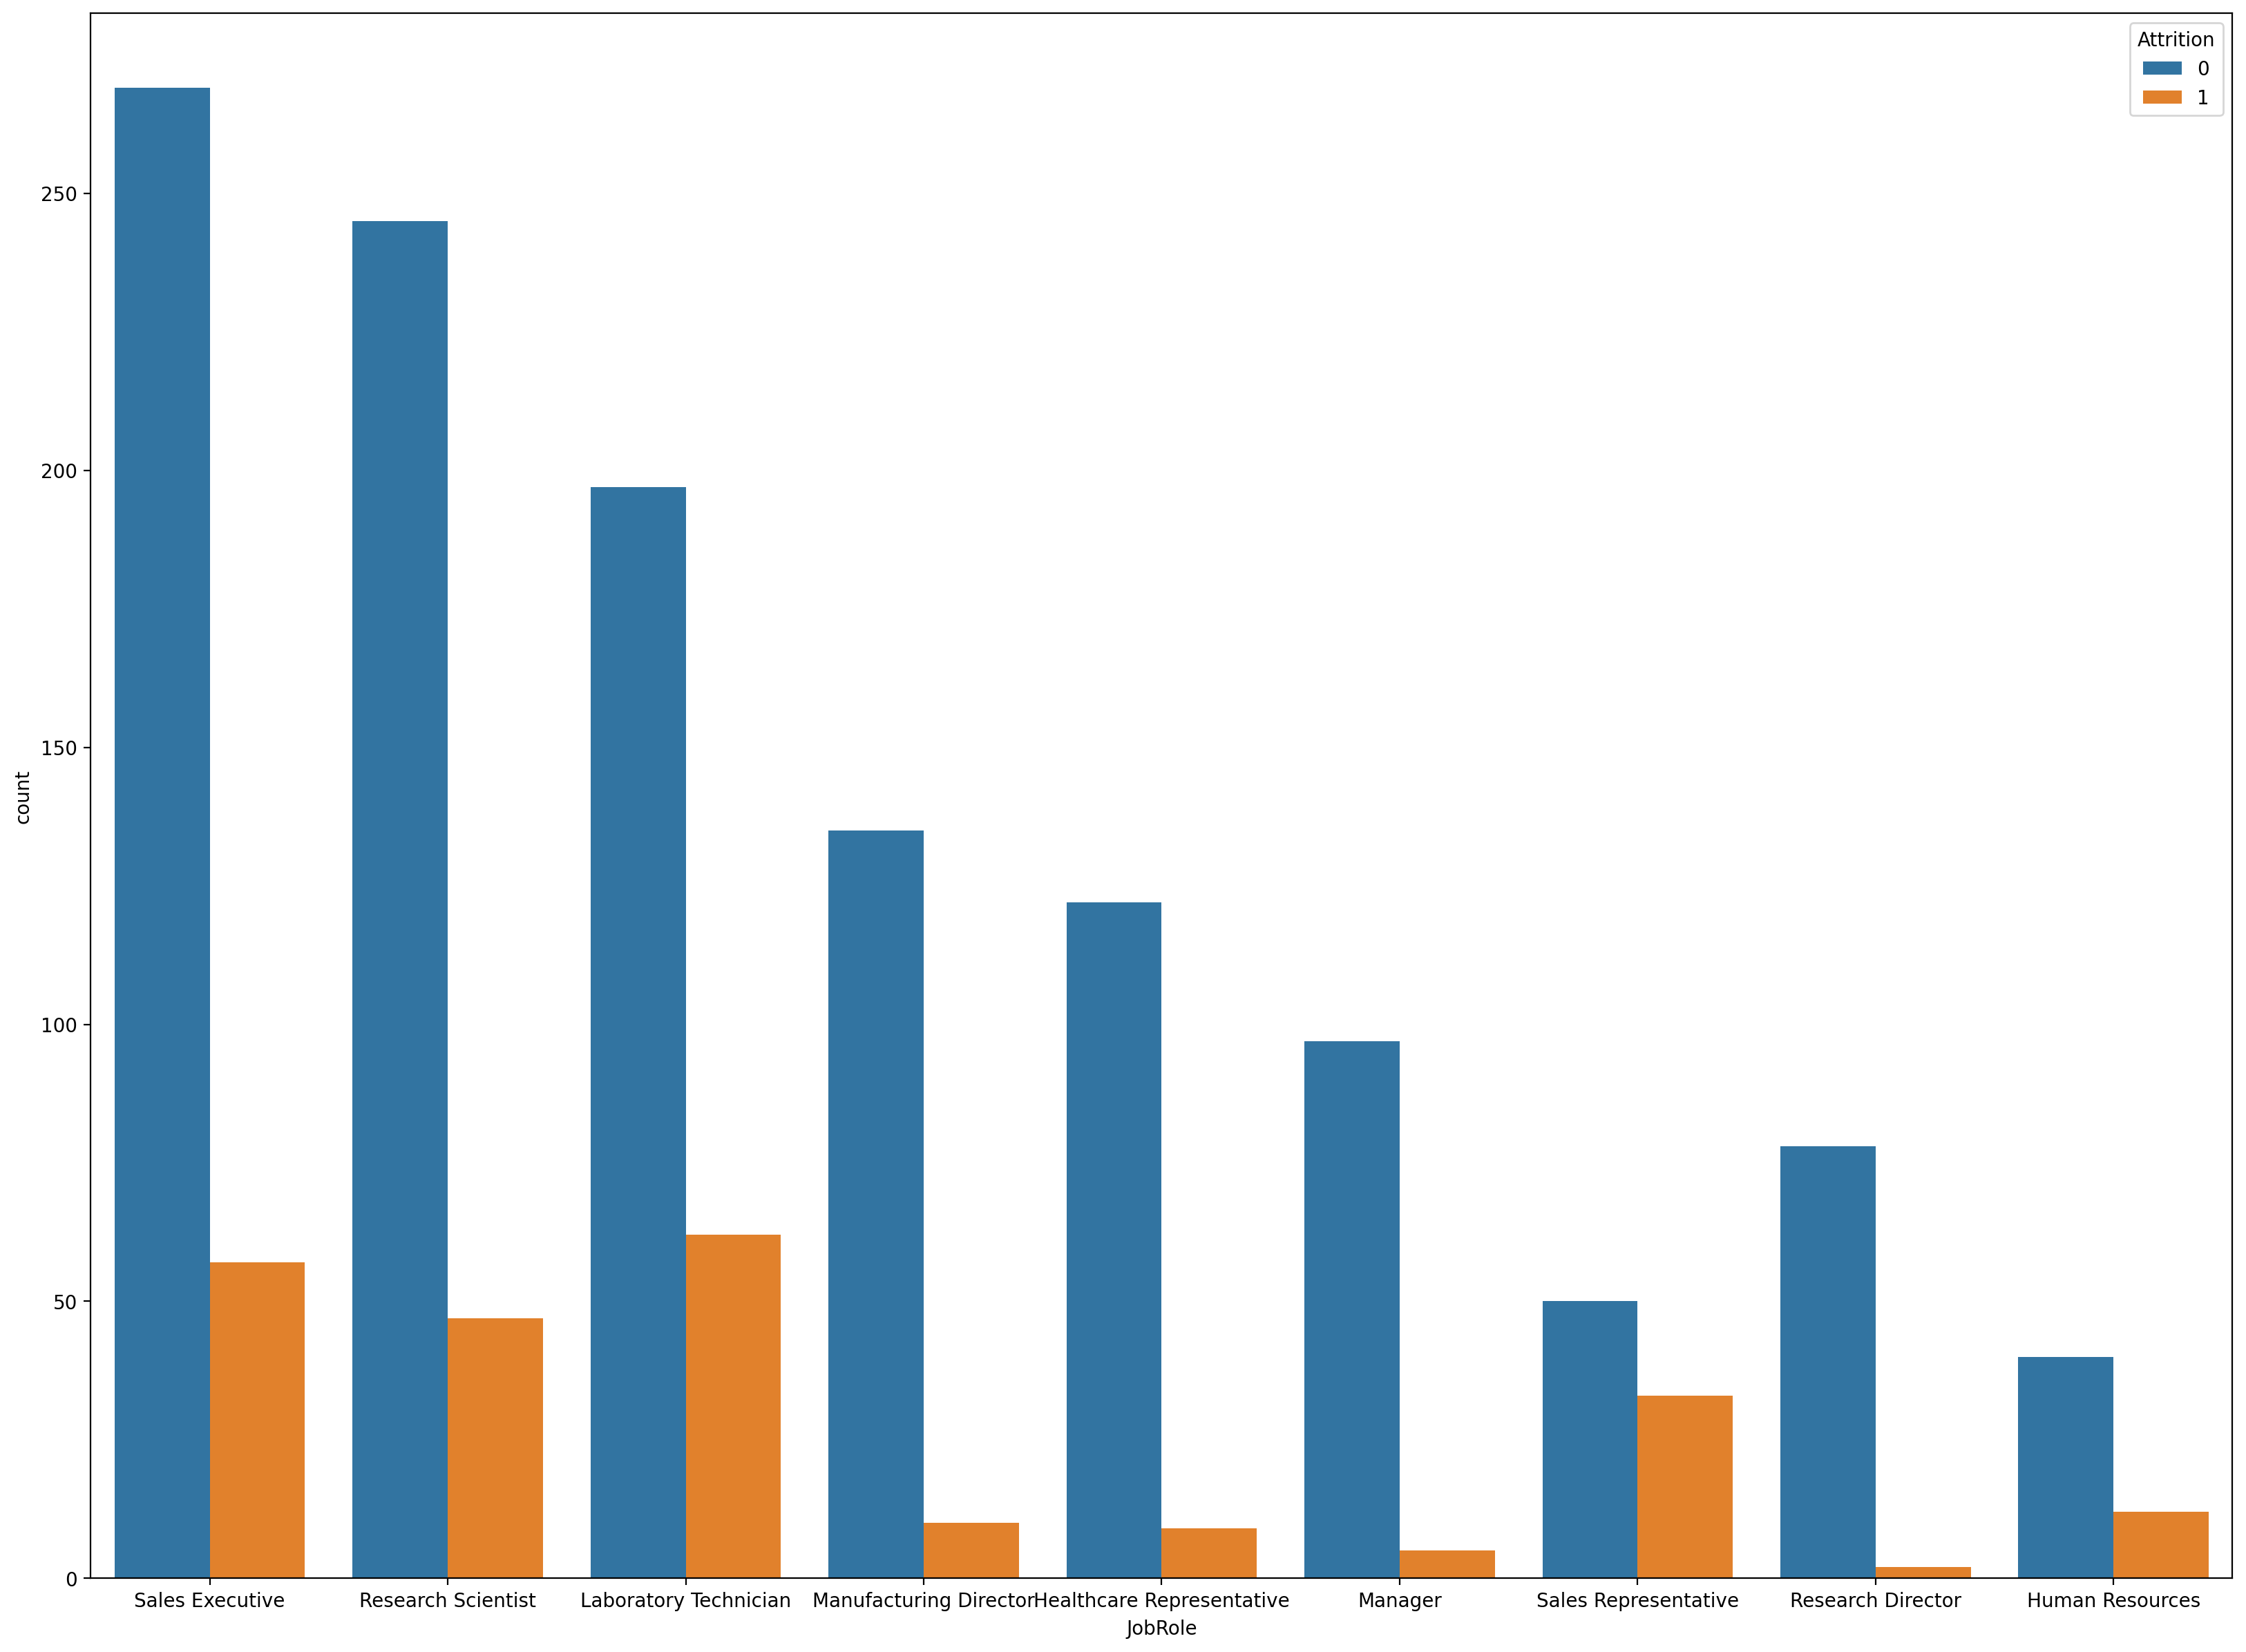

In [34]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='JobRole',hue='Attrition',data=df_employee)
plt.show()

Employees working as Sales Representative are more probable to leave.Sales executives,Research Scientist and Laboratory Technicians are also probable to leave

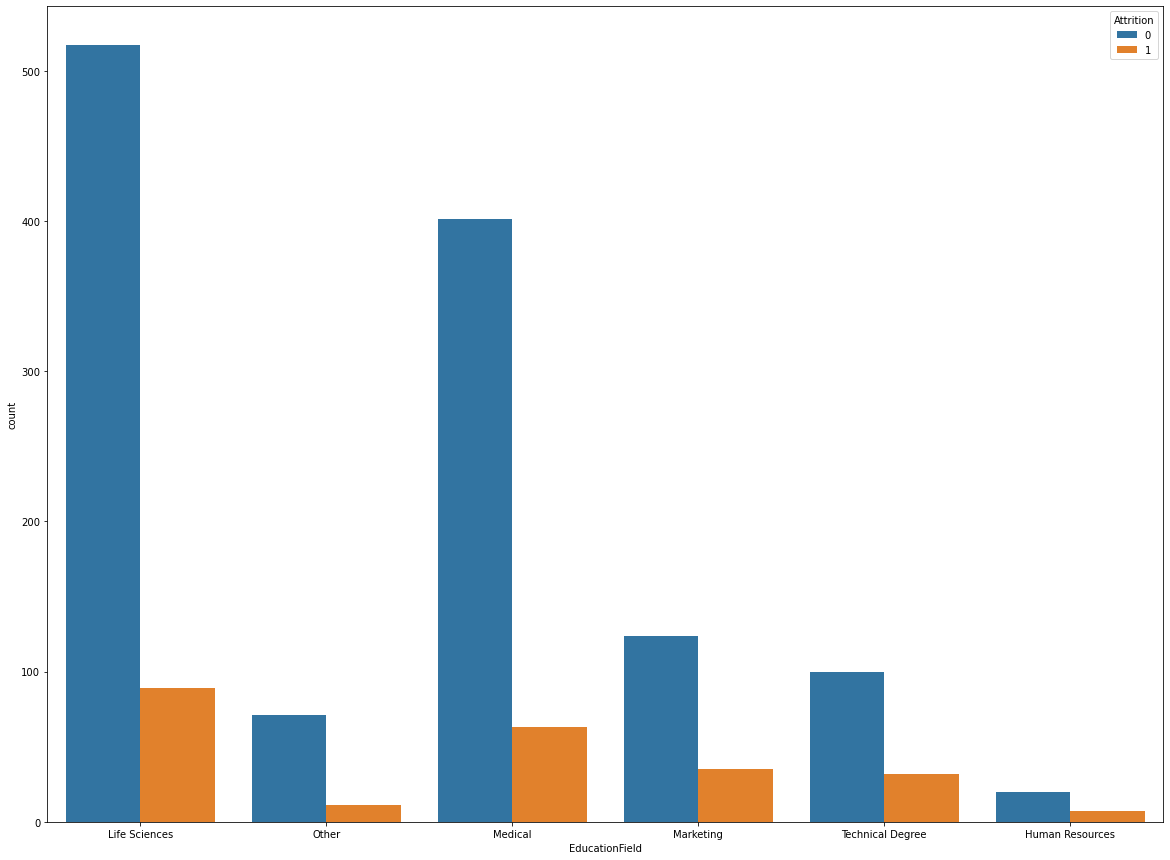

In [35]:
plt.figure(figsize=(20,15))
sns.countplot(x='EducationField',hue='Attrition',data=df_employee)
plt.show()

There are more number of attritions of employees in the educational background of Marketing and Technical Degree

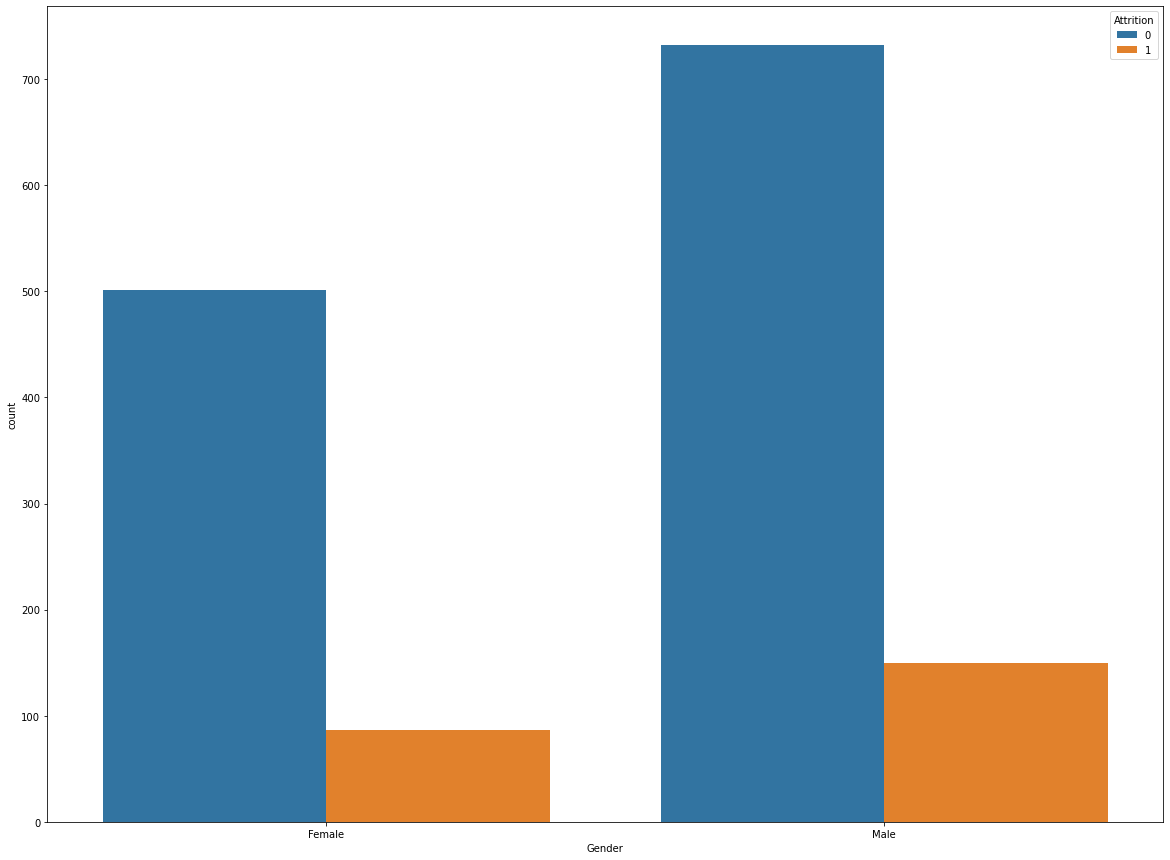

In [36]:
plt.figure(figsize=(20,15))
sns.countplot(x='Gender',hue='Attrition',data=df_employee)
plt.show()

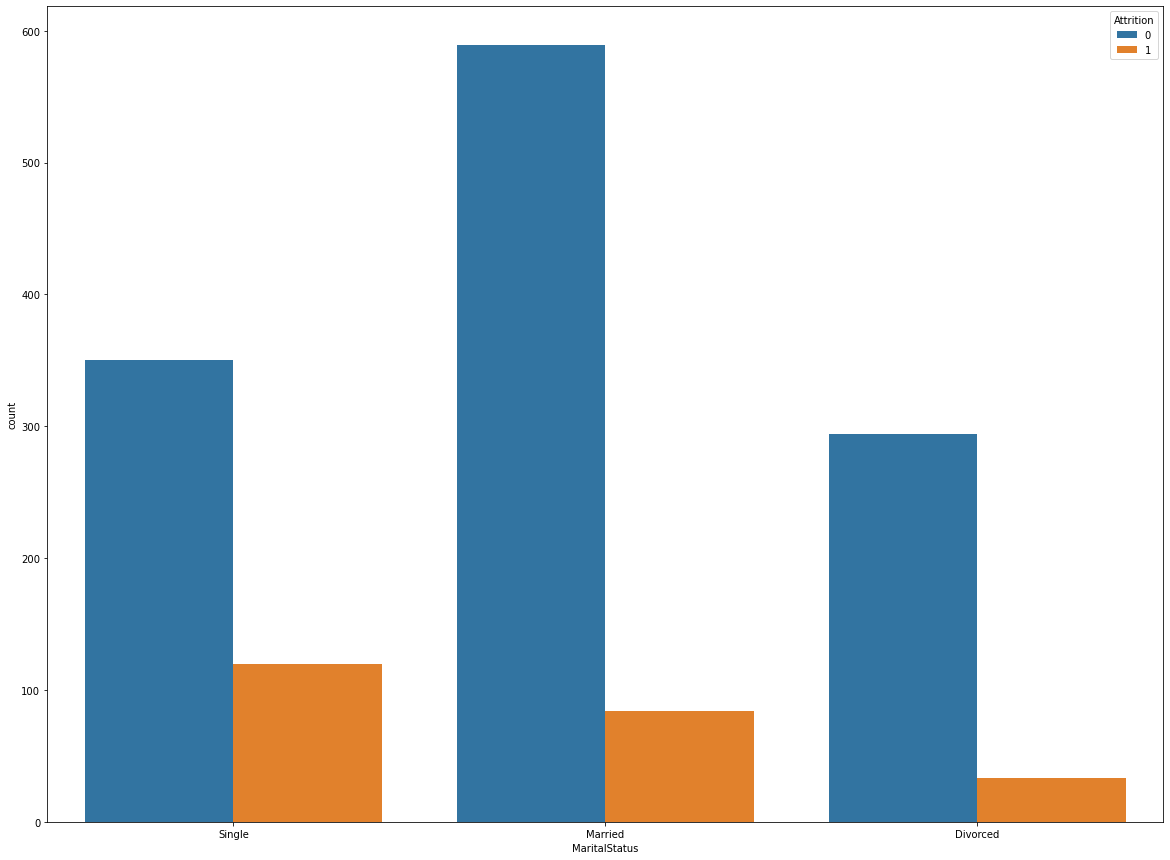

In [37]:
plt.figure(figsize=(20,15))
sns.countplot(x='MaritalStatus',hue='Attrition',data=df_employee)
plt.show()

Graphs indicate that single employees tend to leave more compared to married and divorced

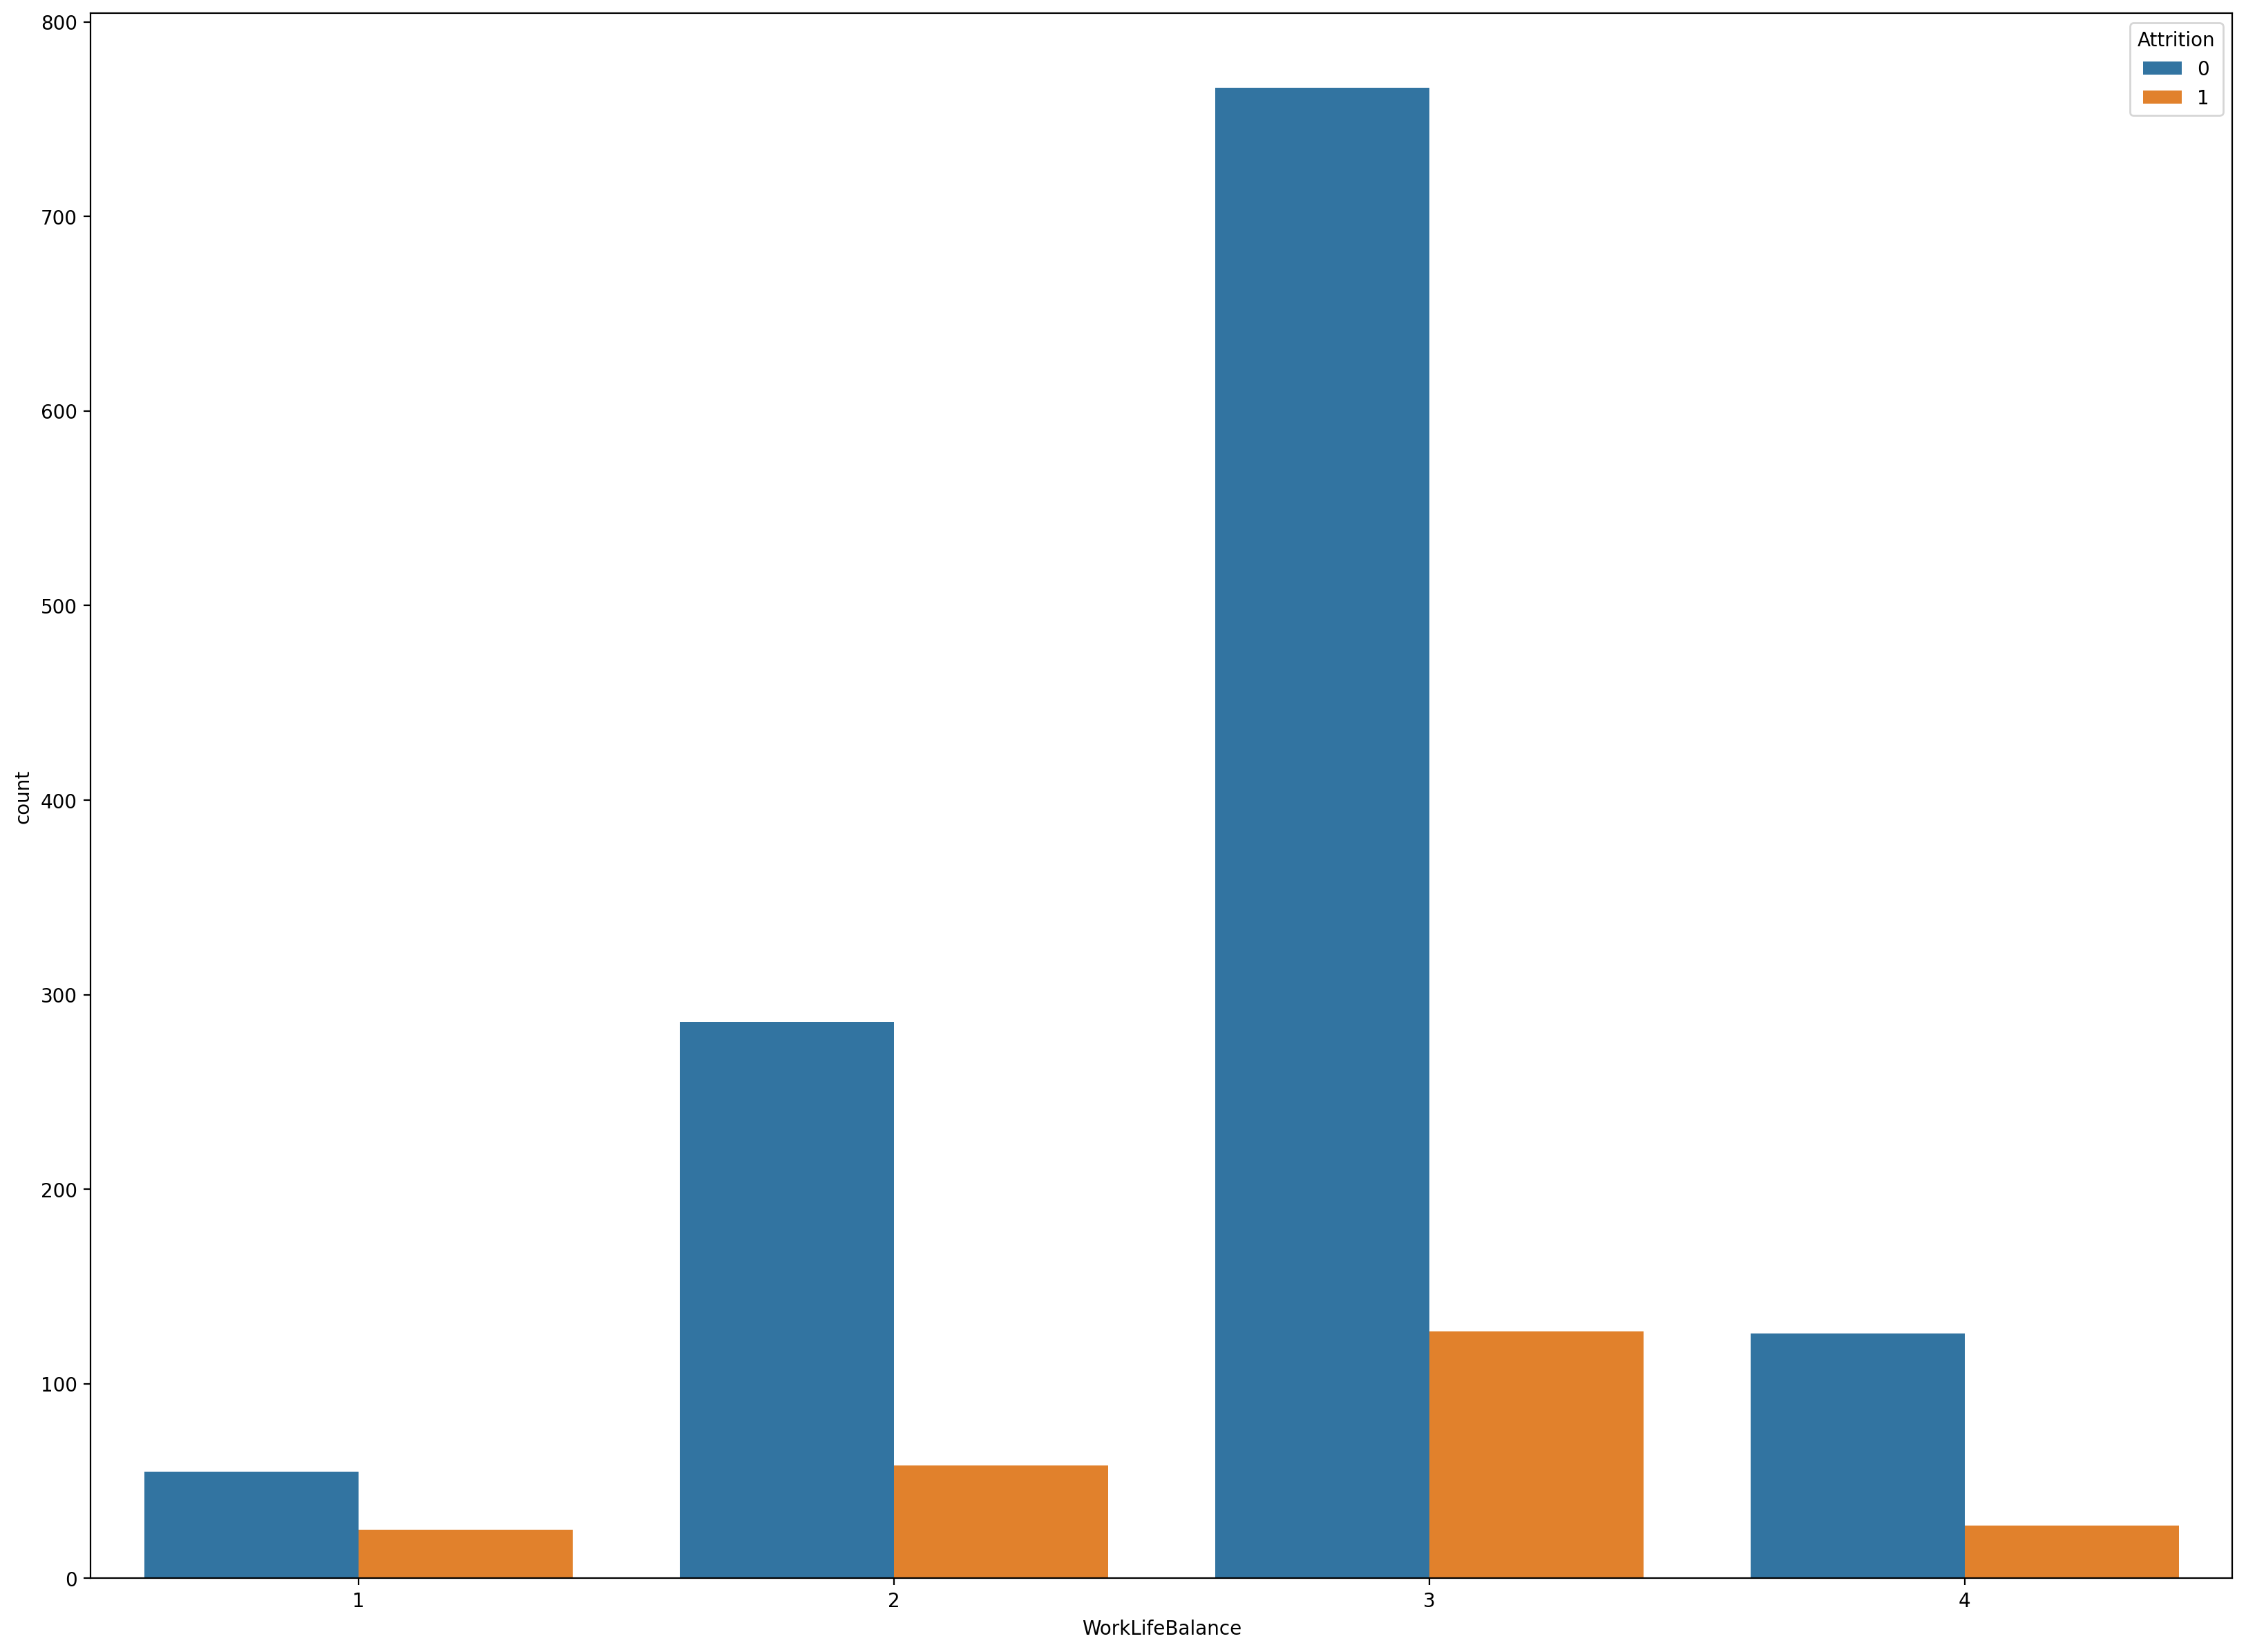

In [38]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=df_employee)
plt.show()

Employees having work life balance level 1 are more probable to leave

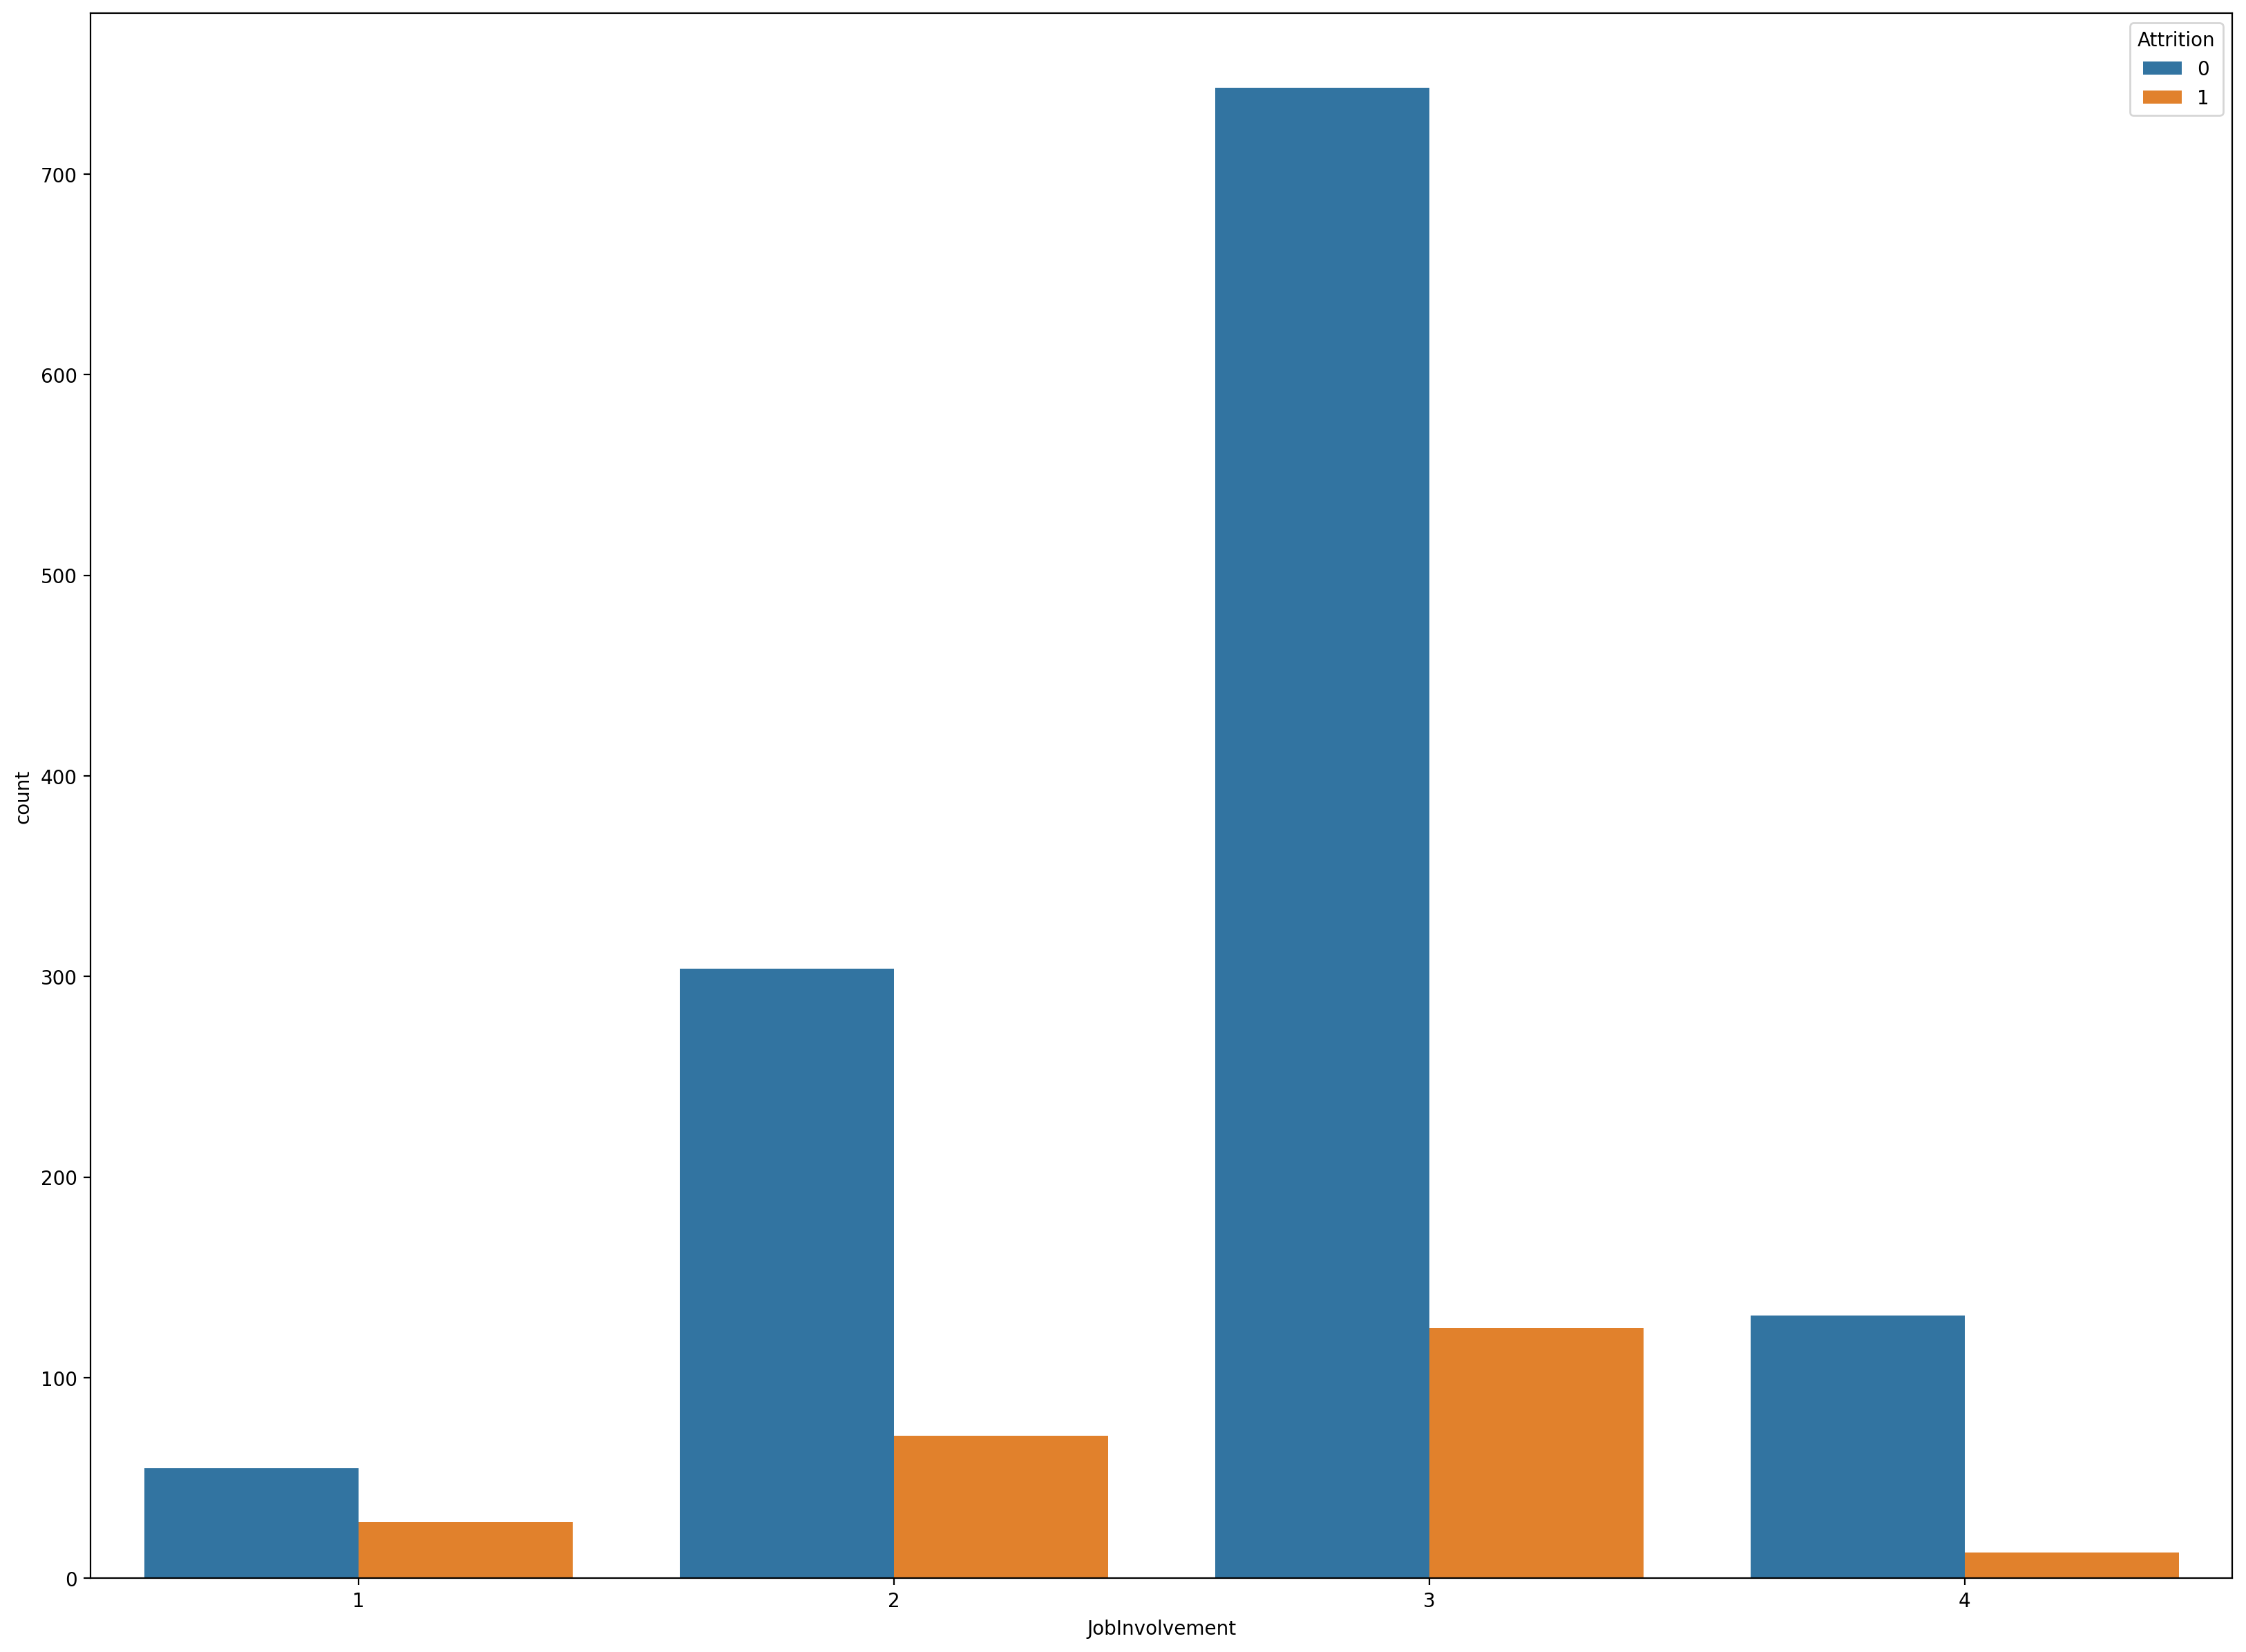

In [39]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='JobInvolvement',hue='Attrition',data=df_employee)
plt.show()

The employees who are least invloved in the job tend to leave

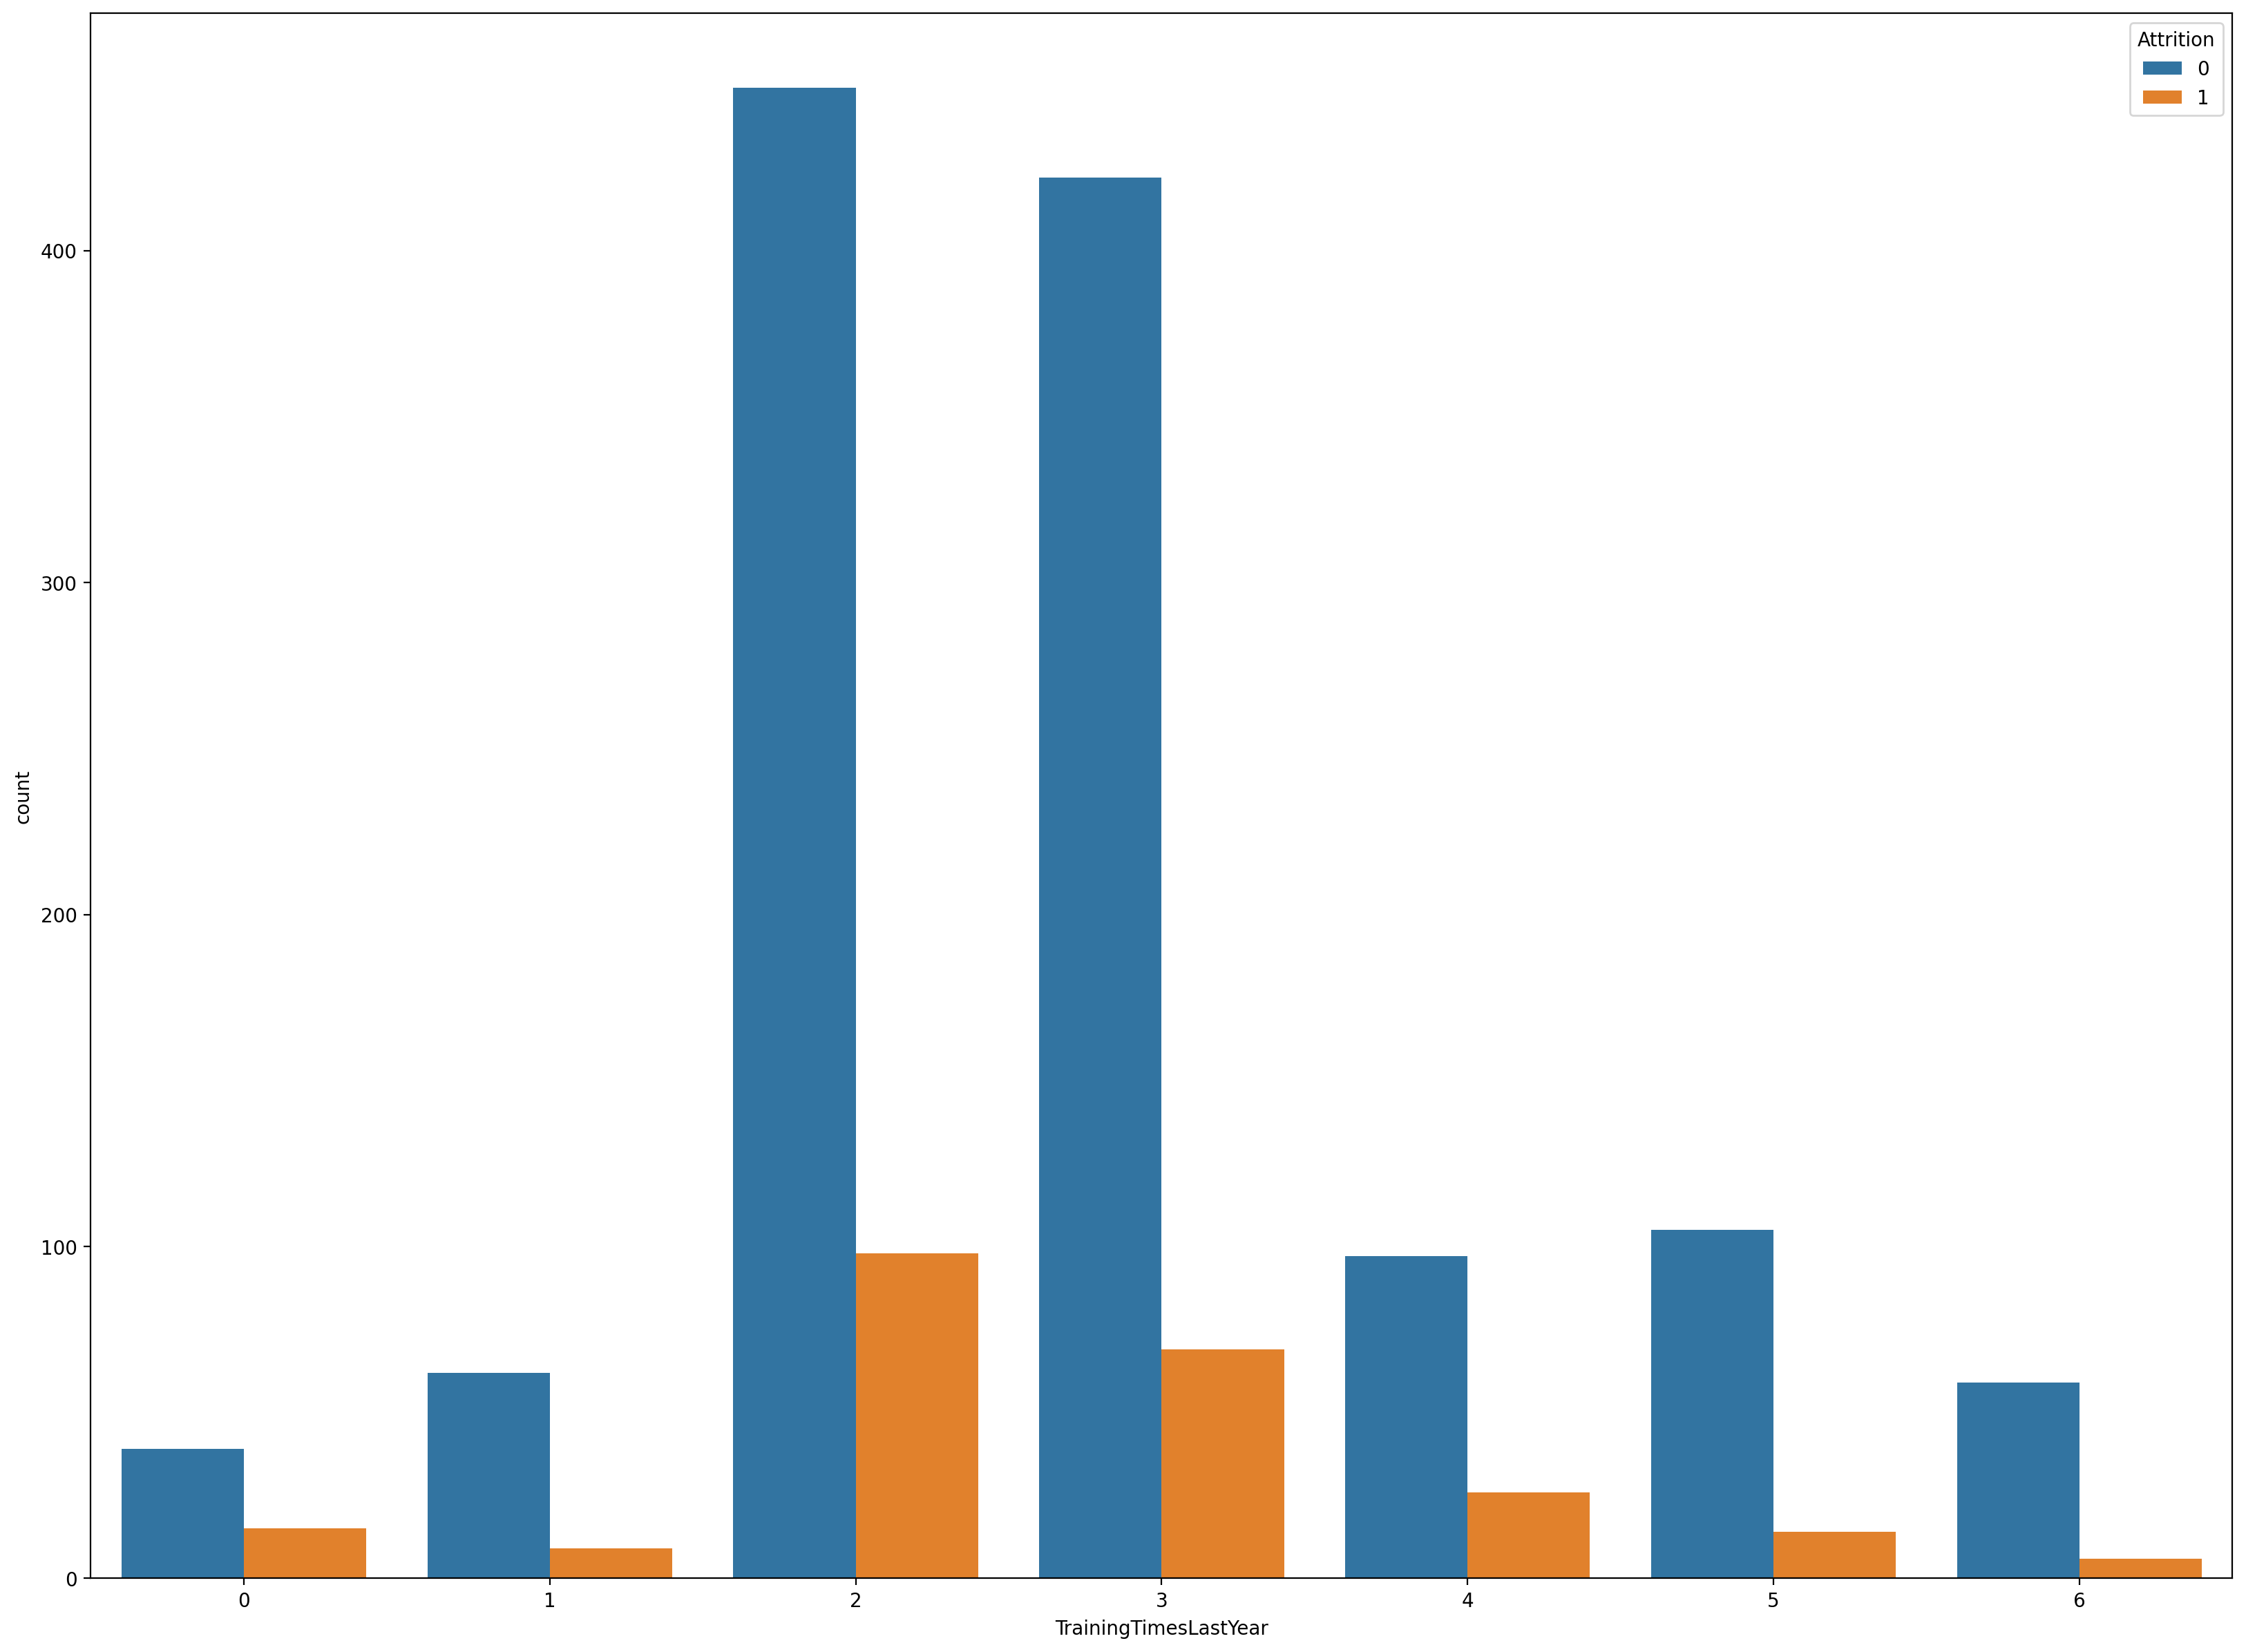

In [40]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=df_employee)
plt.show()

It is clear from the chart that when the number of trainings given to employees increases,the attrition rate of employees decreases

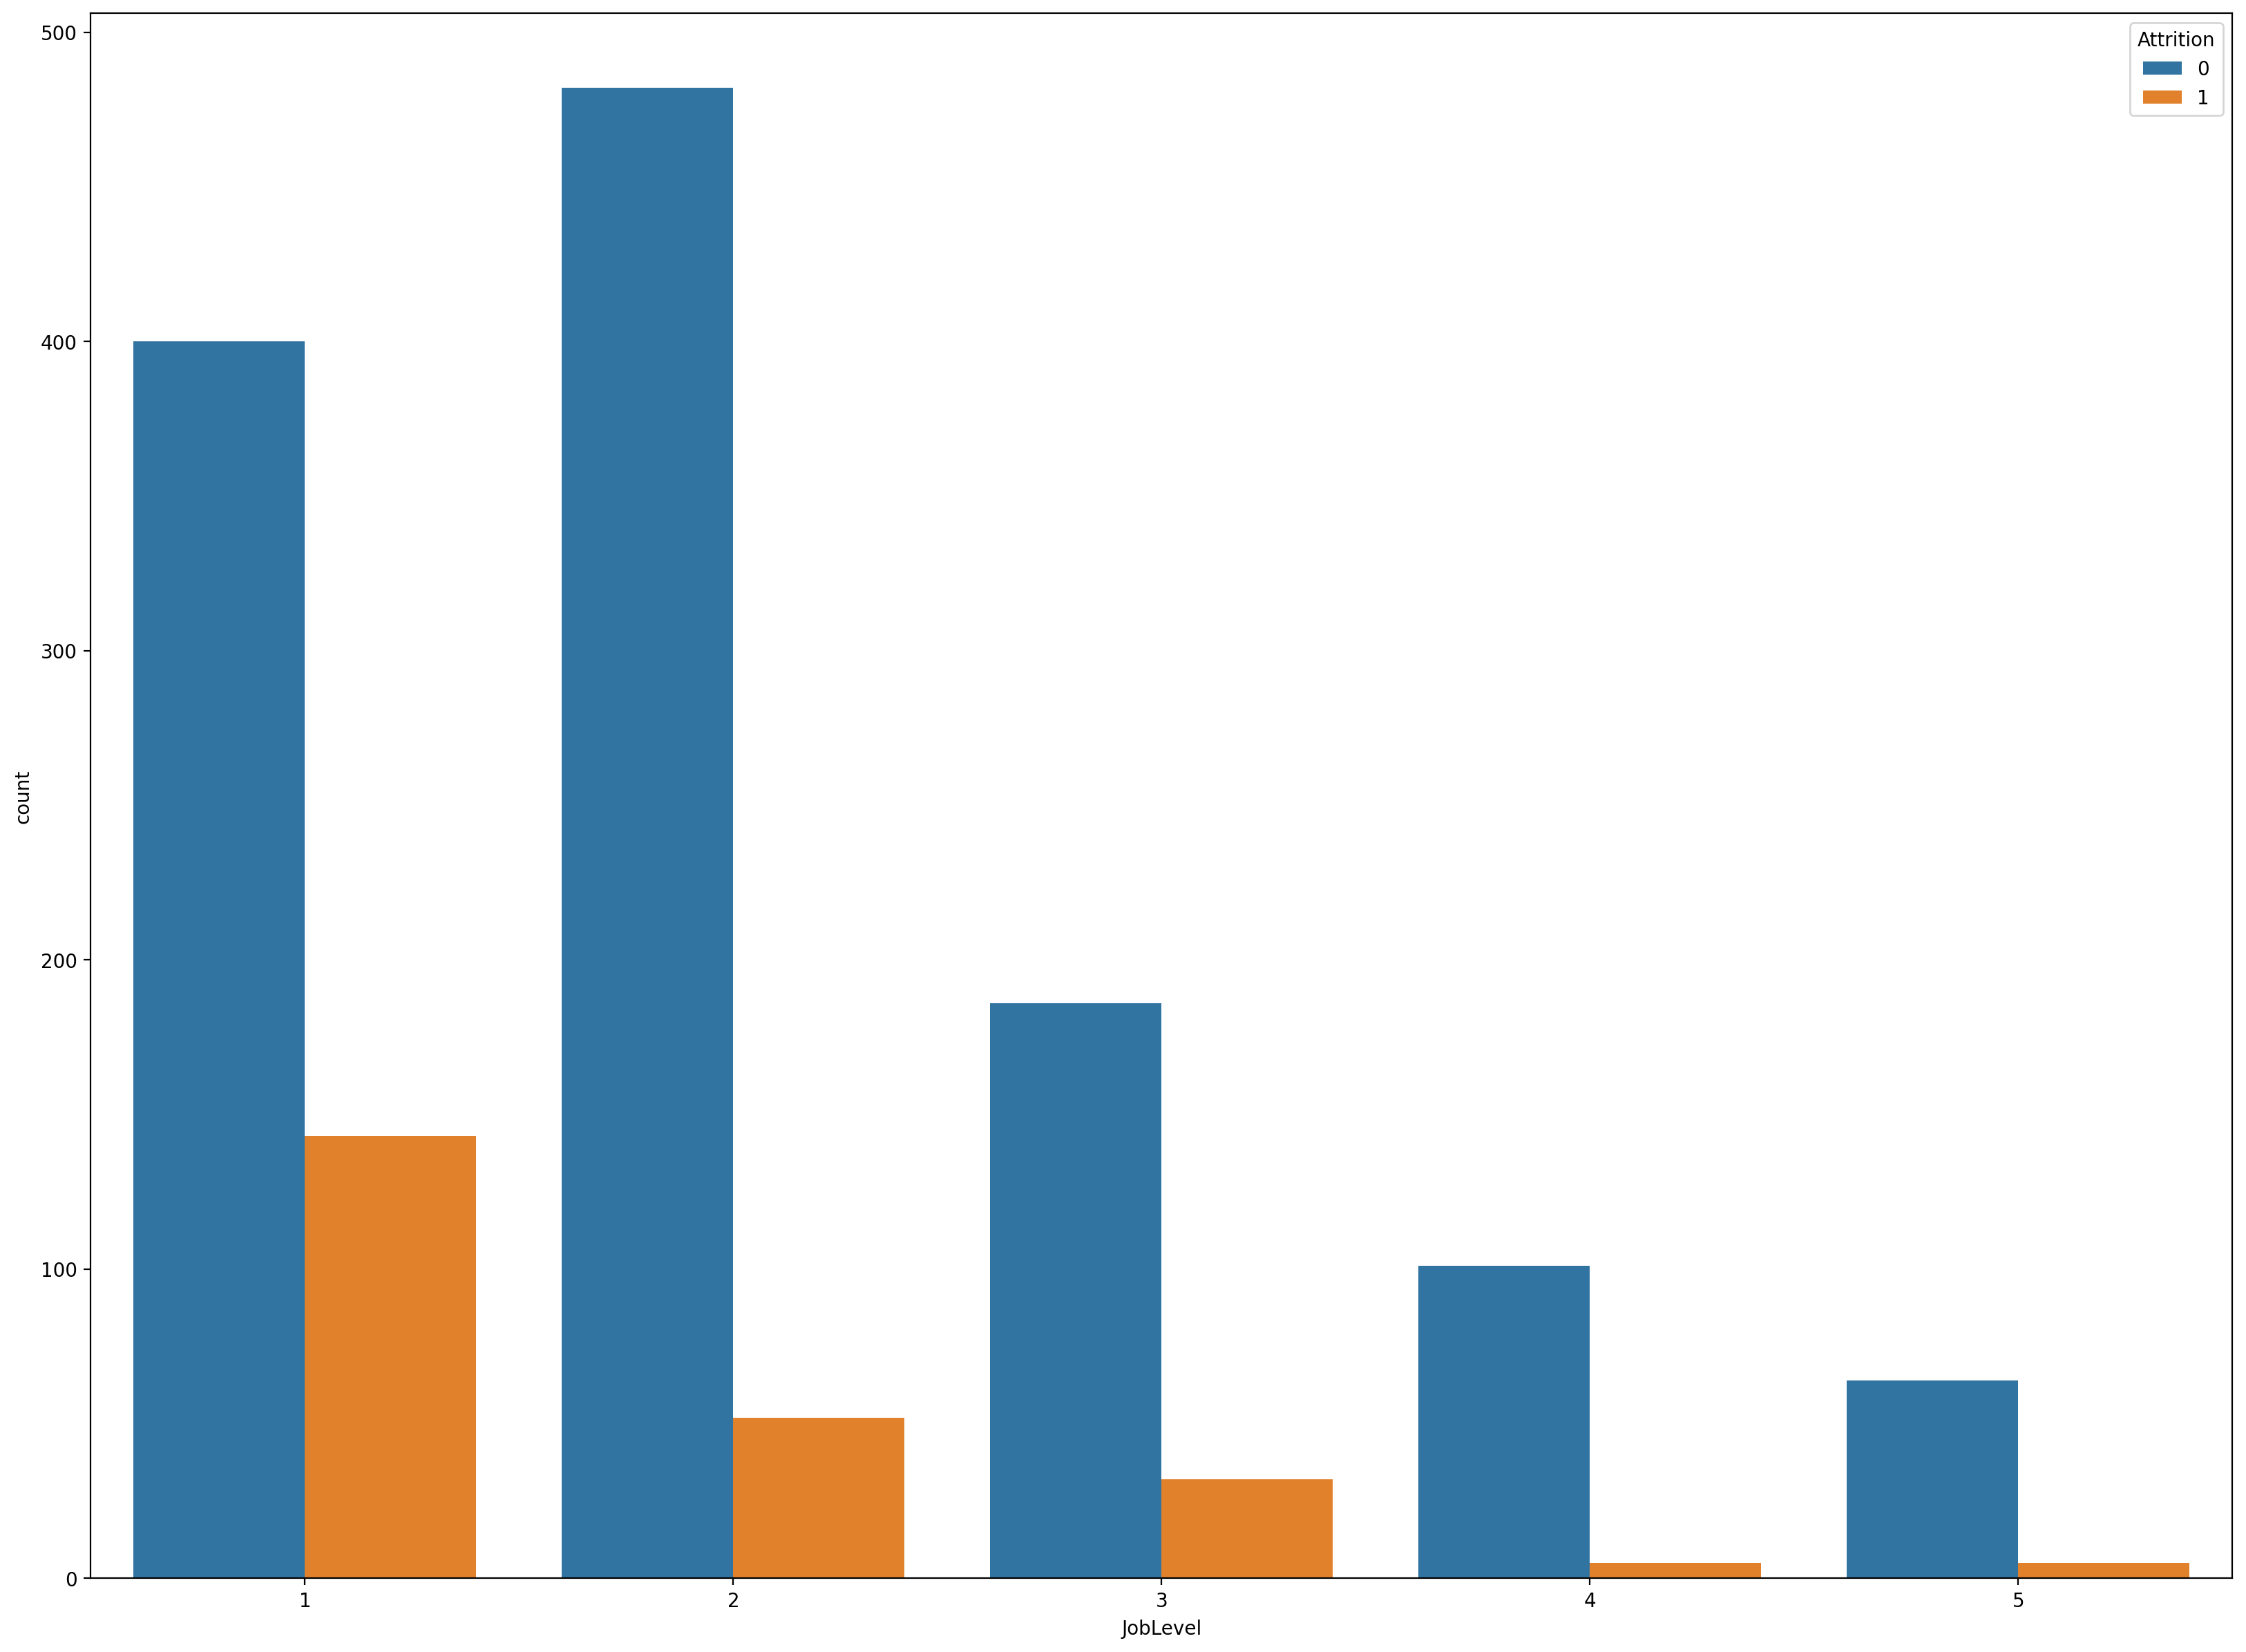

In [41]:
plt.figure(figsize=(20,15),dpi=200)
sns.countplot(x='JobLevel',hue='Attrition',data=df_employee)
plt.show()

Employees of job level 1 are more probable to leave

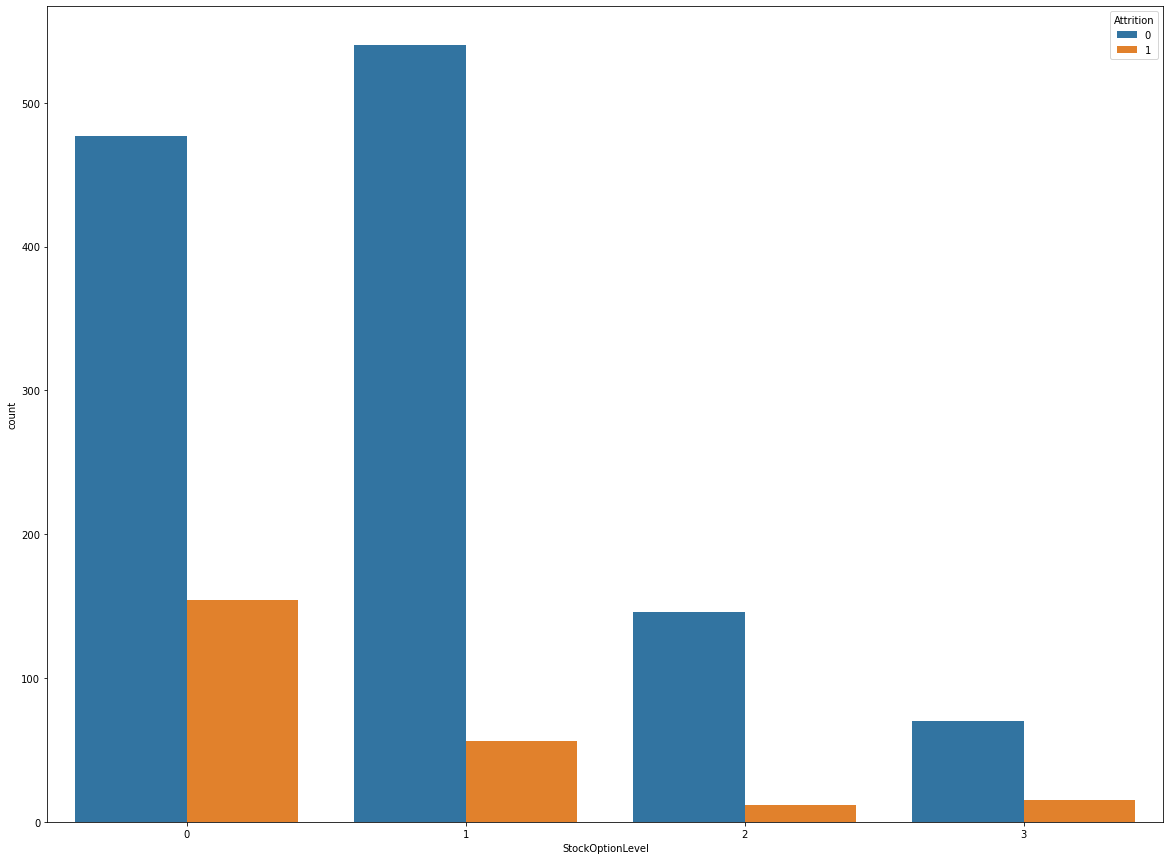

In [42]:
plt.figure(figsize=(20,15))
sns.countplot(x='StockOptionLevel',hue='Attrition',data=df_employee)
plt.show()

When the stock option level is higher,less employees tend to leave

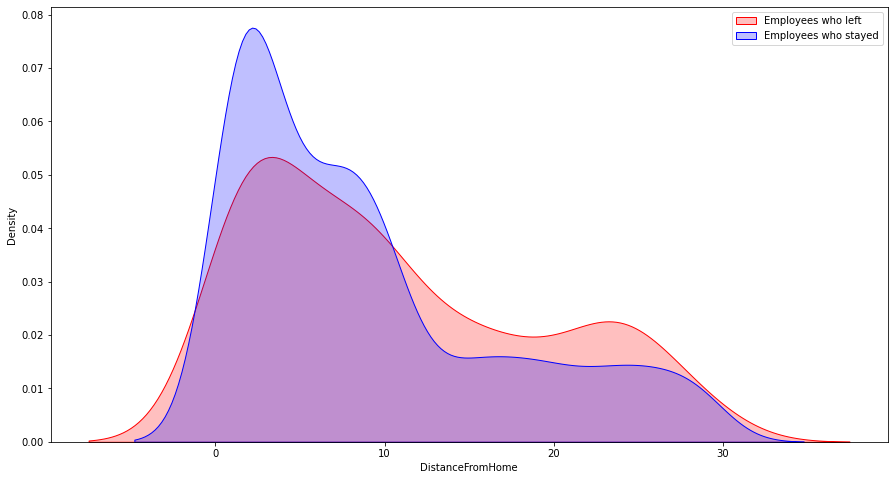

In [43]:
#kde is kernel density estimate which is used for visualising the probability distribution of a continuous variable
#It gives the probability distribution at different values in a continuous variable.
#kdeplot in seaborn is used for plotting the kernel density estimate
plt.figure(figsize=(15,8))
sns.kdeplot(df_left['DistanceFromHome'],shade=True, label= 'Employees who left', color='r')
sns.kdeplot(df_stayed['DistanceFromHome'],shade=True, label= 'Employees who stayed', color='b')
plt.legend()
plt.show()

The blue area plot supersedes the red one ath the beginning which indicates that the employees who are closer to the company are less likely to leave and as the red area plot supersedes the blue one,which represents the employees who are far away from the company are more probable to leave

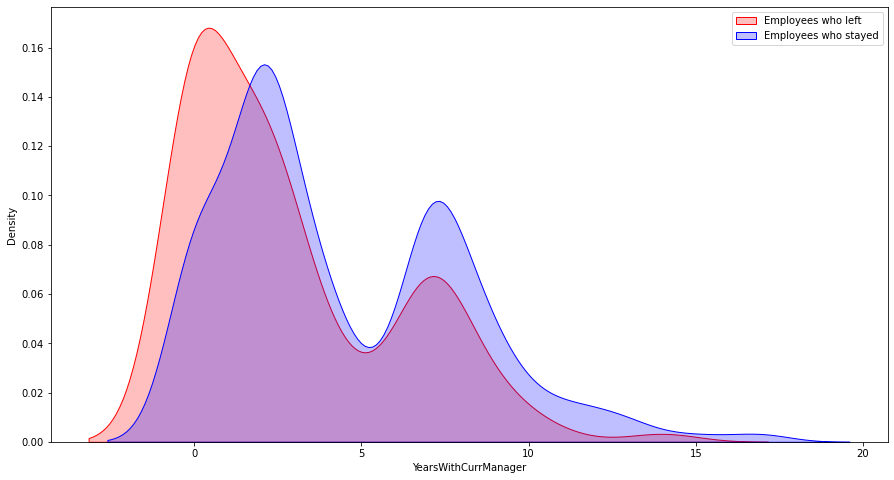

In [44]:
#kde is kernel density estimate which is used for visualising the probability distribution of a continuous variable
#It gives the probability distribution at different values in a continuous variable.
#kdeplot in seaborn is used for plotting the kernel density estimate
plt.figure(figsize=(15,8))
sns.kdeplot(df_left['YearsWithCurrManager'],shade=True, label= 'Employees who left', color='r')
sns.kdeplot(df_stayed['YearsWithCurrManager'],shade=True, label= 'Employees who stayed', color='b')
plt.legend()
plt.show()

Employees who are working under the current manager for more years(more than 5) are less likely to leave and employees who are working for less than 3 years with the current manager are more likely to leave

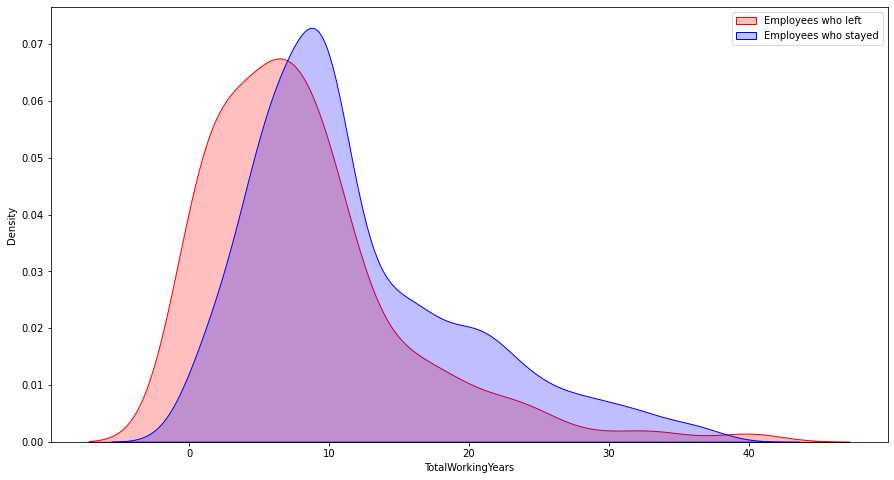

In [488]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_left['TotalWorkingYears'],shade=True,label='Employees who left',color='r')
sns.kdeplot(df_stayed['TotalWorkingYears'],shade=True,label='Employees who stayed',color='b')
plt.legend()
plt.show()

Experienced employees are less likely to leave when compared to employees having less years of experience(less than 5 years)

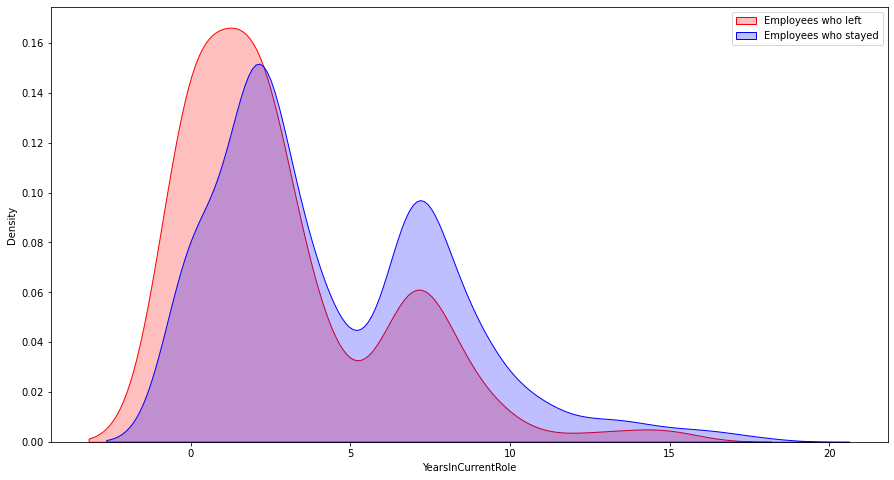

In [46]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_left['YearsInCurrentRole'],shade=True,label='Employees who left',color='r')
sns.kdeplot(df_stayed['YearsInCurrentRole'],shade=True,label='Employees who stayed',color='b')
plt.legend()
plt.show()

Employees who are working more than 5 years in the current role are less likely to leave and the employees who are working less than 3 years in the current job role tend to leave

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

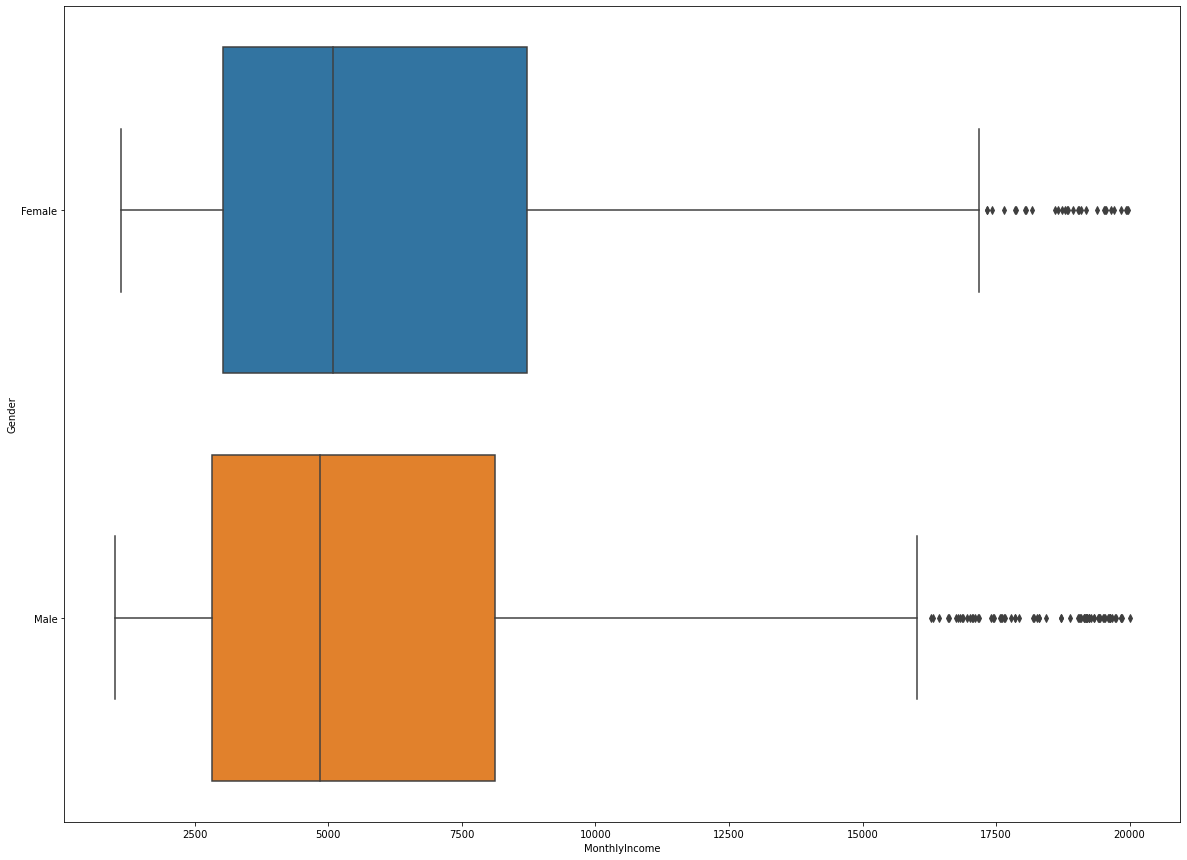

In [48]:
plt.figure(figsize=(20,15))
sns.boxplot(x='MonthlyIncome',y='Gender',data=df_employee)

Both male and female employees are getting decent remuneration and female employees eventhough they are less in number are paid more compared to male.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

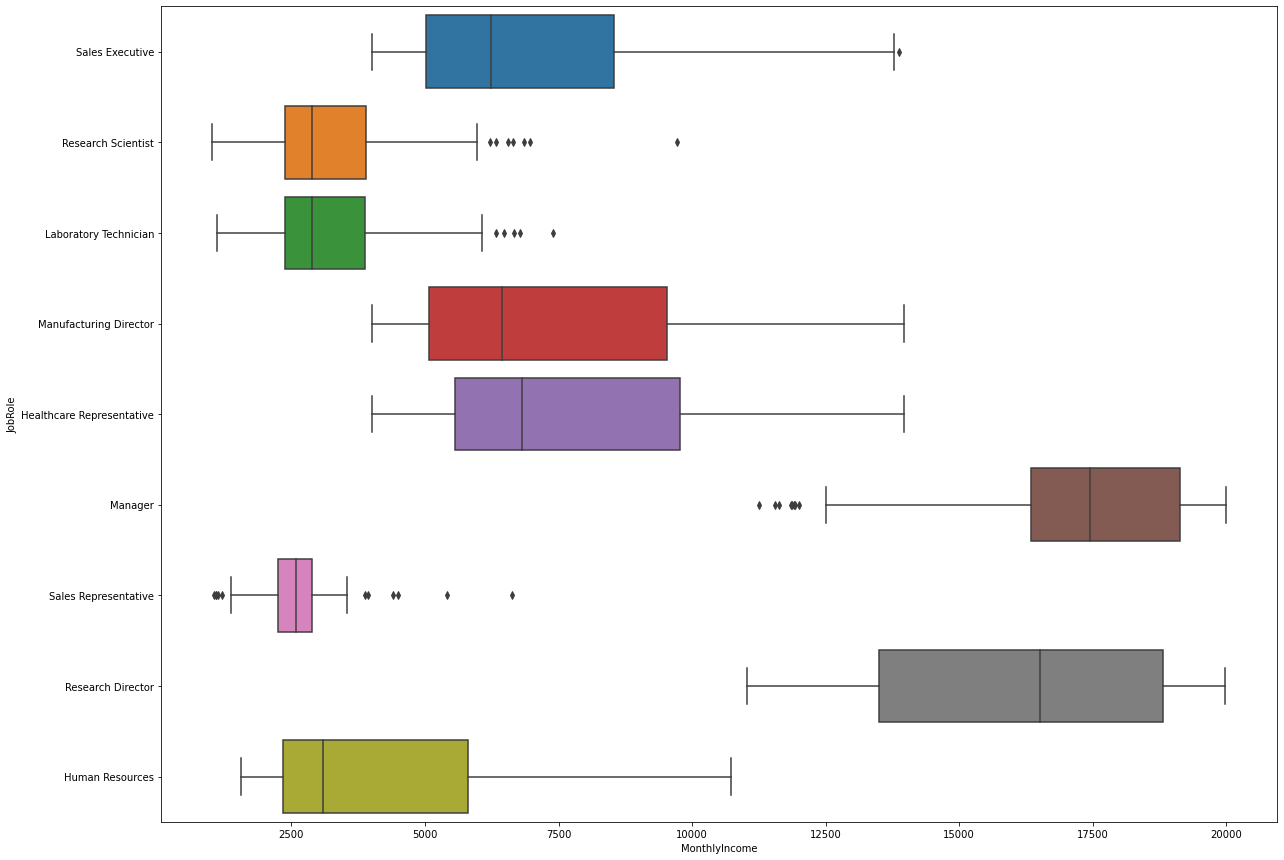

In [49]:
plt.figure(figsize=(20,15))
sns.boxplot(x='MonthlyIncome',y='JobRole',data=df_employee)

Managers and Research Directors are highly paid when compared to employees in other designations.
Sales Representatives are the ones who are paid the least when compared to other employees.
Research Scientists and Laboratory Technicians are almost getting equally paid


## Building Machine Learning Models

In [50]:
df_employee

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,1,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,1,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,1,0,14,3,4,80,0,17,3,2,9,6,0,8


In [51]:
X=df_employee.drop(['Attrition','EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1) #dropping the unimportant columns so as to fit into the ML model

In [52]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [53]:
X=pd.get_dummies(X)#one hot encoding

In [54]:
X

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,...,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,...,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,...,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [55]:
y=df_employee['Attrition']

In [56]:
from sklearn.preprocessing import MinMaxScaler#scaling the dataset
X_norm=MinMaxScaler().fit_transform(X)

In [57]:
from sklearn.model_selection import train_test_split#spliting the dataset into train and test dataset
from sklearn.linear_model import LogisticRegression #import LinearRegression algorithm

In [279]:
from imblearn.over_sampling import SMOTE  #for resampling the imbalanced dataset
X_res,y_res=SMOTE().fit_resample(X,y)

In [486]:
y_res.value_counts() #resampled y values

0    1233
1    1233
Name: Attrition, dtype: int64

In [485]:
Xres_train,Xres_test,yres_train,yres_test=train_test_split(X_res,y_res,test_size=0.2) #creating the resampled train and test dataset

In [247]:
X_train,X_test,y_train,y_test=train_test_split(X_norm,y,test_size=0.25)#splitting the normalised data into train and test dataset

### Logistic Regression 

In [248]:
cls_logreg=LogisticRegression() #creating an object of linear regression

In [249]:
cls_logreg.fit(X_train,y_train)  #fitting the object with the training dataset

LogisticRegression()

In [250]:
cls_logreg.predict(X_test) #predicting the values of attrition

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [261]:
cls_logacc=cls_logreg.score(X_test,y_test) #calculating the accuracy score of the model
cls_logacc

0.8967391304347826

In [262]:
from sklearn.metrics import confusion_matrix       
from sklearn.metrics import classification_report  
confusion_matrix(y_test,cls_logreg.predict(X_test))    #displaying the confusion matrix

array([[299,   5],
       [ 33,  31]])

In [263]:
print(classification_report(y_test,cls_logreg.predict(X_test)))   #displaying the classification report

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       304
           1       0.86      0.48      0.62        64

    accuracy                           0.90       368
   macro avg       0.88      0.73      0.78       368
weighted avg       0.89      0.90      0.88       368



### Ridge Classifier

In [264]:
from sklearn.linear_model import RidgeClassifier  #importing ridgeclassifier
from sklearn.model_selection import GridSearchCV  #importing gridsearchcv for hyper parameter tuning
rdcls=RidgeClassifier()
params={'alpha': [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
hptrdcls=GridSearchCV(rdcls,params)

In [265]:
hptrdcls.fit(X_train,y_train)

GridSearchCV(estimator=RidgeClassifier(),
             param_grid={'alpha': [1e-15, 1e-14, 1e-13, 1e-12, 1e-11, 1e-10,
                                   1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20]})

In [266]:
hptrdcls.best_params_

{'alpha': 1e-15}

In [267]:
rdclshpt=RidgeClassifier(alpha=1e-15)  #creating the ridge classifier object with the best parameters

In [268]:
rdclshpt.fit(X_train,y_train)

RidgeClassifier(alpha=1e-15)

In [270]:
rdclshptacc=rdclshpt.score(X_test,y_test)
rdclshptacc

0.8614130434782609

In [271]:
confusion_matrix(y_test,rdclshpt.predict(X_test))

array([[302,   2],
       [ 49,  15]])

In [272]:
print(classification_report(y_test,rdclshpt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       304
           1       0.88      0.23      0.37        64

    accuracy                           0.86       368
   macro avg       0.87      0.61      0.65       368
weighted avg       0.86      0.86      0.83       368



### XGBoost Classifier

In [362]:
from xgboost import XGBClassifier   #importing the xgboostclassifier from xgboost package
xgb_cls=XGBClassifier()

In [363]:
xgb_cls.fit(Xres_train,yres_train)
xgb_cls.predict(Xres_test)

/home/school/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [391]:
xgbacc=xgb_cls.score(Xres_test,yres_test)
xgbacc

0.9412955465587044

In [365]:
confusion_matrix(yres_test,xgb_cls.predict(Xres_test))

array([[230,   8],
       [ 21, 235]])

In [367]:
print(classification_report(yres_test,xgb_cls.predict(Xres_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       238
           1       0.97      0.92      0.94       256

    accuracy                           0.94       494
   macro avg       0.94      0.94      0.94       494
weighted avg       0.94      0.94      0.94       494



### Random Forest Classifier

In [374]:
from sklearn.ensemble import RandomForestClassifier #importing the randomforestclassifier
rf_cls=RandomForestClassifier()

In [375]:
from sklearn.model_selection import GridSearchCV  #parameter tuning for random forest classifier
n_estimators = [25,50,75,100] #number of decision trees in the forest, default = 100
criterion = ['gini','entropy'] #criteria for choosing nodes default = 'gini'
max_depth = [3,5,10,None] #maximum number of nodes in a tree default = None (it will go till all possible nodes)
max_features = ['sqrt',5,3]
params={'n_estimators': n_estimators,'criterion':criterion,'max_depth':max_depth,
           'max_features':max_features}

In [376]:
hptrf=GridSearchCV(rf_cls,params)
hptrf.fit(Xres_train,yres_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 5, 3],
                         'n_estimators': [25, 50, 75, 100]})

In [377]:
hptrf.best_params_   #displaying the bet parameters after hyperparameter tuning

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 5,
 'n_estimators': 100}

In [378]:
rfhpt_cls=RandomForestClassifier(criterion='entropy',max_depth=None,max_features=5,n_estimators=100)

In [388]:
rfhpt_cls.fit(Xres_train,yres_train)

RandomForestClassifier(criterion='entropy', max_features=5)

In [390]:
rfhpt_cls.predict(Xres_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [392]:
rfhptacc=rfhpt_cls.score(Xres_test,yres_test)
rfhptacc

0.917004048582996

In [393]:
confusion_matrix(yres_test,rfhpt_cls.predict(Xres_test))

array([[223,  15],
       [ 26, 230]])

In [394]:
print(classification_report(yres_test,rfhpt_cls.predict(Xres_test)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       238
           1       0.94      0.90      0.92       256

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



### AdaBoost Classifier

In [395]:
from sklearn.ensemble import AdaBoostClassifier #importing the adaboost classifier
ad_cls=AdaBoostClassifier()

In [401]:
ad_cls.fit(Xres_train,yres_train)
ad_cls.predict(Xres_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [402]:
adacc=ad_cls.score(Xres_test,yres_test)
adacc

0.9230769230769231

In [404]:
confusion_matrix(yres_test,ad_cls.predict(Xres_test))

array([[222,  16],
       [ 22, 234]])

In [406]:
print(classification_report(yres_test,ad_cls.predict(Xres_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       238
           1       0.94      0.91      0.92       256

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



### GradientBoosting Classifier

In [397]:
from sklearn.ensemble import GradientBoostingClassifier #importing the gradient boosting classifier
gb_cls=GradientBoostingClassifier()

In [412]:
gb_cls.fit(Xres_train,yres_train)
gb_cls.predict(Xres_test)

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [413]:
gbacc=gb_cls.score(Xres_test,yres_test)
gbacc

0.9210526315789473

In [414]:
confusion_matrix(yres_test,gb_cls.predict(Xres_test))

array([[229,   9],
       [ 30, 226]])

In [415]:
print(classification_report(yres_test,gb_cls.predict(Xres_test)))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       238
           1       0.96      0.88      0.92       256

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494



In [425]:
print('Accuracy Scores for different algorithms\n')
print('Logistic Regression:',round(cls_logacc,3))
print('\nRidge Classifier:',round(rdclshptacc,3))
print('\nXGBoost Classifier:',round(xgbacc,3))
print('\nRandomForest Classifier:',round(rfhptacc,3))
print('\nAdaboost Classifier:',round(adacc,3))
print('\nGradient Boosting Classifier:',round(gbacc,3))

Accuracy Scores for different algorithms

Logistic Regression: 0.897

Ridge Classifier: 0.861

XGBoost Classifier: 0.941

RandomForest Classifier: 0.917

Adaboost Classifier: 0.923

Gradient Boosting Classifier: 0.921


From the above accuracy scores,it is certain that xgboost classifier has the highest accuracy score.So the algorithm is used for predicting the employee turnover(attrition).

Now we will convert the xgbclassifier object into a pickle file and save in the local

In [426]:
import joblib
joblib.dump(xgb_cls,'/home/school/Documents/Employee turnover and hr analytics/xgboostclassifiermodel.pkl') #for saving the ML object to a pickle file(pickling)

['/home/school/Documents/Employee turnover and hr analytics/xgboostclassifiermodel.pkl']

In [427]:
xgb_clsmodel=joblib.load('/home/school/Documents/Employee turnover and hr analytics/xgboostclassifiermodel.pkl')#loading the ML object from the pickle file(unpickling)

In [429]:
xgb_clsmodel.score(Xres_test,yres_test)

0.9412955465587044

In [430]:
featureimportns=xgb_clsmodel.feature_importances_ #for calculating the importances of the features in predicting the dependent variable or target variable
featureimpargsrt=featureimportns.argsort() #performing argsort
dfcolumns=X.columns
print('Features Importances percentage ')
for i in featureimpargsrt:
    print('\n',dfcolumns[i],':',round(featureimportns[i]*100,3),'%')

Features Importances percentage 

 JobRole_Research Director : 0.0 %

 JobRole_Human Resources : 0.0 %

 JobRole_Sales Executive : 0.052 %

 Education : 0.289 %

 JobRole_Healthcare Representative : 0.327 %

 JobRole_Manufacturing Director : 0.445 %

 PercentSalaryHike : 0.504 %

 JobRole_Manager : 0.529 %

 YearsSinceLastPromotion : 0.541 %

 DailyRate : 0.574 %

 MonthlyRate : 0.586 %

 JobRole_Sales Representative : 0.6 %

 Age : 0.608 %

 HourlyRate : 0.613 %

 DistanceFromHome : 0.677 %

 PerformanceRating : 0.755 %

 NumCompaniesWorked : 0.782 %

 TotalWorkingYears : 0.791 %

 TrainingTimesLastYear : 0.801 %

 YearsWithCurrManager : 0.852 %

 MonthlyIncome : 0.869 %

 YearsInCurrentRole : 1.046 %

 YearsAtCompany : 1.134 %

 OverTime : 1.298 %

 WorkLifeBalance : 1.619 %

 Gender_Female : 1.717 %

 RelationshipSatisfaction : 1.726 %

 EnvironmentSatisfaction : 1.736 %

 EducationField_Life Sciences : 1.823 %

 BusinessTravel_Travel_Rarely : 1.854 %

 BusinessTravel_Travel_Frequen

### Using the ML trained model to predict the currently working employees who are more probable to leave 

In [439]:
X_overtimedf=df_overtime
X_overtimedf=X_overtimedf.set_index('EmployeeNumber')
X_overtimedf=X_overtimedf.drop(['Attrition','EmployeeCount','Over18','StandardHours'],axis=1)
X_overtimedf=pd.get_dummies(X_overtimedf)

In [440]:
xgb_clsmodel.predict_proba(X_overtimedf)[:,1] # finding the probability that the employee will leave for all the values in the dataframe 

array([1.51588514e-01, 2.07337495e-02, 9.05427150e-03, 6.38605747e-03,
       9.11874510e-03, 5.19708637e-03, 1.83037540e-03, 2.45333109e-02,
       1.99281499e-02, 4.87057120e-03, 2.23117461e-03, 4.40401435e-02,
       4.24549216e-03, 6.51990762e-03, 2.21309671e-03, 6.39706478e-02,
       8.90034658e-04, 5.88429905e-02, 2.75693107e-02, 2.18757172e-03,
       2.68536876e-03, 2.85475422e-02, 3.70821159e-04, 1.69359464e-02,
       1.48387076e-02, 7.10953679e-03, 2.52861460e-03, 1.63482677e-03,
       6.92695100e-03, 1.91143272e-03, 3.25221978e-02, 7.24797789e-03,
       2.76953890e-03, 3.37520381e-03, 1.81361083e-02, 3.01586501e-02,
       6.75528601e-04, 2.49028043e-03, 8.38167779e-03, 2.26750015e-03,
       3.60078923e-03, 1.09022707e-01, 1.20412540e-02, 1.14727532e-03,
       5.66801336e-03, 7.36898219e-04, 1.62666608e-02, 3.73197086e-02,
       1.05734915e-02, 2.40798444e-02, 1.05514622e-03, 5.40824654e-03,
       2.71641393e-03, 1.09810838e-02, 8.26330576e-03, 5.62685961e-03,
      

In [441]:
X_overtimedf['P(employee will leave)']=xgb_clsmodel.predict_proba(X_overtimedf)[:,1]

In [442]:
X_overtimedf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.151589
10,59,1324,3,3,3,81,4,1,1,2670,9964,4,1,20,4,1,3,12,3,2,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.020734
15,29,153,15,2,4,49,2,2,3,4193,12682,0,1,12,3,4,0,10,3,3,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.009054
21,32,334,5,2,1,80,4,1,2,3298,15053,0,1,12,3,4,2,7,5,2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0.006386
22,22,1123,16,2,4,96,4,1,4,2935,7324,1,1,13,3,2,2,1,2,2,...,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.009119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021,21,501,5,1,3,58,3,1,1,2380,25479,1,1,11,3,4,0,2,6,3,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.046822
2040,35,1146,26,4,3,31,3,3,4,8837,16642,1,1,16,3,3,0,9,2,3,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0.013371
2049,35,1199,18,4,3,80,3,2,3,5689,24594,1,1,14,3,4,2,10,2,4,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0.003432


In [445]:
dfovertimeleave=X_overtimedf.sort_values('P(employee will leave)',ascending=False)
#dfovertimeleave is the dataframe which contains the informations of employees who are more probable to leave the company sorted in the descending order of their priority

In [455]:
print('Details of first 10 among the hard working employees who are more probable to leave the company')
dfovertimeleave.head(10)

Details of first 10 among the hard working employees who are more probable to leave the company


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
875,42,1271,2,1,2,35,3,1,4,2515,9068,5,1,14,3,4,0,8,2,3,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.455994
1556,36,1157,2,4,3,70,3,1,4,2644,17001,3,1,21,4,4,0,7,3,2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.434353
403,37,889,9,3,2,53,3,1,4,2326,11411,1,1,12,3,3,3,4,3,2,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.363049
1448,41,1283,5,5,2,90,4,1,3,2127,5561,2,1,12,3,1,0,7,5,2,...,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.284424
1036,38,1035,3,4,2,42,3,2,4,6861,4981,8,1,12,3,3,0,19,1,3,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.275368
925,47,1454,2,4,4,65,2,1,4,3294,13137,1,1,18,3,1,0,3,3,2,...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.257591
904,37,1252,19,2,1,32,3,3,2,7642,4814,1,1,13,3,4,0,10,2,3,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.226211
5,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.151589
1591,50,264,9,3,3,59,3,5,3,19331,19519,4,1,16,3,3,1,27,2,3,...,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0.137323


In [448]:
X_bestdf=df_best
X_bestdf=X_bestdf.set_index('EmployeeNumber')
X_bestdf=X_bestdf.drop(['Attrition','EmployeeCount','Over18','StandardHours'],axis=1)
X_bestdf=pd.get_dummies(X_bestdf)

In [449]:
xgb_clsmodel.predict_proba(X_bestdf)[:,1]

array([4.49125096e-03, 2.07337495e-02, 1.76860683e-03, 2.13140971e-03,
       1.75021682e-03, 1.13907866e-02, 4.06605937e-02, 1.99281499e-02,
       4.87057120e-03, 7.56450789e-03, 1.21326739e-04, 2.21309671e-03,
       2.96233193e-04, 2.48457887e-04, 2.75693107e-02, 2.51958147e-03,
       1.58844749e-03, 2.85475422e-02, 1.88460518e-02, 2.39307134e-04,
       4.58071008e-03, 7.09400475e-02, 1.26831075e-02, 6.12019934e-03,
       1.76340602e-02, 1.91143272e-03, 2.96623986e-02, 3.25221978e-02,
       7.24797789e-03, 8.28354154e-04, 6.36281399e-03, 1.93234514e-02,
       1.06168436e-02, 2.49028043e-03, 3.11983330e-03, 6.38968311e-03,
       6.97614206e-03, 7.36898219e-04, 1.12232631e-02, 5.42468190e-01,
       8.08501092e-04, 7.89920799e-03, 1.09810838e-02, 2.62248842e-03,
       1.48241466e-03, 3.94426897e-04, 1.48160988e-02, 2.49498151e-03,
       3.25759361e-03, 1.13536778e-03, 6.77908119e-03, 2.37804558e-03,
       7.50421081e-03, 8.99479273e-05, 9.42797679e-03, 2.65574432e-04,
      

In [450]:
X_bestdf['P(employee will leave)']=xgb_clsmodel.predict_proba(X_bestdf)[:,1]

In [451]:
X_bestdf

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.004491
10,59,1324,3,3,3,81,4,1,1,2670,9964,4,1,20,4,1,3,12,3,2,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.020734
11,30,1358,24,1,4,67,3,1,3,2693,13335,1,0,22,4,2,1,1,2,3,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.001769
12,38,216,23,3,4,44,2,3,3,9526,8787,0,0,21,4,2,0,10,2,3,...,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0.002131
57,30,721,1,2,3,58,3,2,4,4011,10781,1,0,23,4,4,0,12,2,3,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.001750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,56,667,1,4,3,57,3,2,3,6306,26236,1,0,21,4,1,1,13,2,2,...,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0.000531
2034,41,582,28,4,1,60,2,4,2,13570,5640,0,0,23,4,3,1,21,3,3,...,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0.000234
2035,34,704,28,3,4,95,2,2,3,6712,8978,1,0,21,4,4,2,8,2,3,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.004549


In [452]:
dfbestleave=X_bestdf.sort_values('P(employee will leave)',ascending=False)
#dfbestleave is the dataframe which contains the information of best performing employees who are more probable to leave the company sorted in the descending order of their priority

In [456]:
print('Details of the first 10 among the best performing employees who are more probable to leave the company')
dfbestleave.head(10)

Details of the first 10 among the best performing employees who are more probable to leave the company


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
359,32,1311,7,3,2,100,4,1,2,2794,26062,1,0,20,4,3,0,5,3,1,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.542468
1556,36,1157,2,4,3,70,3,1,4,2644,17001,3,1,21,4,4,0,7,3,2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.434353
613,31,688,7,3,3,44,2,3,4,11557,25291,9,0,21,4,3,1,10,3,2,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.157174
763,40,804,2,1,4,86,2,1,4,2342,22929,0,1,20,4,4,0,5,2,2,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.080161
155,36,922,3,2,1,39,3,1,4,2835,2561,5,0,22,4,1,1,7,2,3,...,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.070940
1675,38,148,2,3,4,42,2,1,2,2440,23826,1,0,22,4,2,0,4,3,3,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0.046047
1890,36,1213,2,1,2,94,2,2,4,3886,4223,1,0,21,4,4,0,10,2,2,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0.042921
846,28,760,2,4,2,81,3,2,2,4779,3698,1,1,20,4,1,0,8,2,3,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.040944
61,37,408,19,2,2,73,3,1,2,3022,10227,4,0,21,4,1,0,8,1,3,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0.040661


In [469]:
X_impempdf=df_impemp
X_impempdf=X_impempdf.set_index('EmployeeNumber')
X_impempdf=X_impempdf.drop(['Attrition','EmployeeCount','Over18','StandardHours'],axis=1)


In [470]:
X_impempdf

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0
62,46,Travel_Frequently,1211,Sales,5,4,Marketing,1,Male,98,3,2,Sales Executive,4,Single,5772,20445,4,1,21,4,3,0,14,4,3,9,6,0,8
68,44,Travel_Rarely,1488,Sales,1,5,Marketing,2,Female,75,3,2,Sales Executive,1,Divorced,5454,4009,5,1,21,4,3,1,9,2,2,4,3,1,3
78,32,Travel_Rarely,427,Research & Development,1,3,Medical,1,Male,33,3,2,Manufacturing Director,4,Married,6162,10877,1,1,22,4,2,1,9,3,3,9,8,7,8
103,46,Travel_Rarely,945,Human Resources,5,2,Medical,2,Male,80,3,2,Human Resources,2,Divorced,5021,10425,8,1,22,4,4,1,16,2,3,4,2,0,2
120,51,Travel_Rarely,632,Sales,21,4,Marketing,3,Male,71,3,2,Sales Executive,4,Single,5441,8423,0,1,22,4,4,0,11,2,1,10,7,1,0
193,38,Travel_Rarely,364,Research & Development,3,5,Technical Degree,4,Female,32,3,2,Research Scientist,3,Single,4317,2302,3,1,20,4,2,0,19,2,3,3,2,2,2
205,53,Travel_Rarely,1436,Sales,6,2,Marketing,2,Male,34,3,2,Sales Representative,3,Married,2306,16047,2,1,20,4,4,1,13,3,1,7,7,4,5
214,58,Travel_Rarely,1145,Research & Development,9,3,Medical,2,Female,75,2,1,Research Scientist,2,Married,3346,11873,4,1,20,4,2,1,9,3,2,1,0,0,0


In [471]:
X_impempdfnum=X_impempdf.select_dtypes(include=['int64','float64'])#dataframe of only numerical columns
X_impempdfobj1=pd.get_dummies(X_impempdf[['BusinessTravel','Department']])

In [474]:
X_impempdfobj1['EducationField_Human Resources']=0

In [475]:
X_impempdfobj2=pd.get_dummies(X_impempdf[['EducationField','Gender','JobRole','MaritalStatus']])#dataframe of categorical columns

In [476]:
X_impempdffinal=pd.concat([X_impempdfnum,X_impempdfobj1,X_impempdfobj2],axis=1)#combining both numerical and categorical columns

In [478]:
X_impempdffinal#final dataframe used for fitting into the ML model

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,59,1324,3,3,3,81,4,1,1,2670,9964,4,1,20,4,1,3,12,3,2,...,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
62,46,1211,5,4,1,98,3,2,4,5772,20445,4,1,21,4,3,0,14,4,3,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
68,44,1488,1,5,2,75,3,2,1,5454,4009,5,1,21,4,3,1,9,2,2,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
78,32,427,1,3,1,33,3,2,4,6162,10877,1,1,22,4,2,1,9,3,3,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
103,46,945,5,2,2,80,3,2,2,5021,10425,8,1,22,4,4,1,16,2,3,...,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
120,51,632,21,4,3,71,3,2,4,5441,8423,0,1,22,4,4,0,11,2,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
193,38,364,3,5,4,32,3,2,3,4317,2302,3,1,20,4,2,0,19,2,3,...,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1
205,53,1436,6,2,2,34,3,2,3,2306,16047,2,1,20,4,4,1,13,3,1,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0
214,58,1145,9,3,2,75,2,1,2,3346,11873,4,1,20,4,2,1,9,3,2,...,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [479]:
xgb_clsmodel.predict_proba(X_impempdffinal)[:,1]

array([2.0733749e-02, 1.9928150e-02, 4.8705712e-03, 2.2130967e-03,
       2.7569311e-02, 2.8547542e-02, 1.9114327e-03, 3.2522198e-02,
       7.2479779e-03, 2.4902804e-03, 7.3689822e-04, 1.0981084e-02,
       2.4949815e-03, 2.8808305e-02, 1.7307539e-02, 8.1309867e-05,
       9.5802126e-03, 8.0161184e-02, 1.1975764e-02, 4.0944017e-02,
       4.6940437e-03, 7.0867658e-04, 3.3040582e-03, 1.8654458e-04,
       4.9112859e-04, 8.3148258e-04, 8.0737378e-03, 3.4602500e-02,
       4.6596192e-03, 6.7913304e-03, 5.8601651e-04, 2.3539186e-02,
       5.9091137e-03, 4.3435347e-01, 9.2318631e-04, 2.7444027e-04,
       1.8589408e-03, 8.9928840e-04, 1.9109096e-02, 2.8746322e-04,
       3.9772913e-03, 4.4192718e-03], dtype=float32)

In [480]:
X_impempdffinal['P(employee will leave)']=xgb_clsmodel.predict_proba(X_impempdffinal)[:,1]

In [481]:
X_impempdffinal

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10,59,1324,3,3,3,81,4,1,1,2670,9964,4,1,20,4,1,3,12,3,2,...,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0.020734
62,46,1211,5,4,1,98,3,2,4,5772,20445,4,1,21,4,3,0,14,4,3,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.019928
68,44,1488,1,5,2,75,3,2,1,5454,4009,5,1,21,4,3,1,9,2,2,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0.004871
78,32,427,1,3,1,33,3,2,4,6162,10877,1,1,22,4,2,1,9,3,3,...,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0.002213
103,46,945,5,2,2,80,3,2,2,5021,10425,8,1,22,4,4,1,16,2,3,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.027569
120,51,632,21,4,3,71,3,2,4,5441,8423,0,1,22,4,4,0,11,2,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.028548
193,38,364,3,5,4,32,3,2,3,4317,2302,3,1,20,4,2,0,19,2,3,...,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.001911
205,53,1436,6,2,2,34,3,2,3,2306,16047,2,1,20,4,4,1,13,3,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.032522
214,58,1145,9,3,2,75,2,1,2,3346,11873,4,1,20,4,2,1,9,3,2,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0.007248


In [482]:
dfimpempleave=X_impempdffinal.sort_values('P(employee will leave)',ascending=False)
#dfimpempleave contains the information of the employees who are both hard working and best performing(important employees) who are more probable to leave the company sorted in the descending order of priority

In [487]:
print('The details of first 10 among the hybrid of best performing and hard working employees who are more probable to leave the company')
dfimpempleave.head(10)

The details of first 10 among the hybrid of best performing and hard working employees who are more probable to leave the company


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,P(employee will leave)
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1556,36,1157,2,4,3,70,3,1,4,2644,17001,3,1,21,4,4,0,7,3,2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0.434353
763,40,804,2,1,4,86,2,1,4,2342,22929,0,1,20,4,4,0,5,2,2,...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.080161
846,28,760,2,4,2,81,3,2,2,4779,3698,1,1,20,4,1,0,8,2,3,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0.040944
1275,26,583,4,2,3,53,3,1,4,2875,9973,1,1,20,4,2,0,8,2,2,...,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0.034603
205,53,1436,6,2,2,34,3,2,3,2306,16047,2,1,20,4,4,1,13,3,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.032522
556,38,1490,2,2,4,42,3,1,4,1702,12106,1,1,23,4,3,1,1,3,3,...,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0.028808
120,51,632,21,4,3,71,3,2,4,5441,8423,0,1,22,4,4,0,11,2,1,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.028548
103,46,945,5,2,2,80,3,2,2,5021,10425,8,1,22,4,4,1,16,2,3,...,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0.027569
1541,34,1440,7,2,2,55,3,1,3,2308,4944,0,1,25,4,2,1,12,4,3,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0.023539
